In [122]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/Yur/Downloads/ovitrap_data_with_province.csv", index_col=[0], usecols = ['date', 'id', 'value', 'adm'])

## Get a summary of the data per school, this makes the datacleaning more easy
    - Get schools with more than 50 observations, to have more reliable measurements
    - Filter schools with a maximum level that is less than 10 (very unlikely, probably misreporting)
    - Filter school with very high means (result of misreporting)
    - Filter schools with more than 50% 100's or 0's
    - Filter schools with only the same observations
    - Remove values that are between 0 and 1.5 as it is not plausible that a school has more than 60 ovitraps
    

In [123]:
summary_df = df.groupby(['id']).describe()

In [124]:
summary_df.columns = summary_df.columns.droplevel(0)

In [133]:
sum_df = summary_df[summary_df['count'] > 50] 
sum_df = sum_df[sum_df['max'] > 10] 
sum_df = sum_df[sum_df['mean'] < 90] 
sum_df = sum_df[~(((sum_df['50%']==0)|(sum_df['50%']==100)))]
sum_df = sum_df[~(sum_df['max'] == sum_df['min'])]

In [134]:
# import full dataset, such that we can extract all the relevant schools
df = pd.read_csv("/Users/Yur/Downloads/ovitrap_data_with_province.csv", index_col=[0])
df = df[df['id'].isin(sum_df.index.tolist())]

df_plausible = df[~((df['value']>0) & (df['value']<1.5))] # removes values 0<x<1.5
df_plausible = df_plausible[~((df_plausible['value']<100) & (df['value']>98.5))] # removes values 98.5<x<100
print('Amount of observations that are not plausible: ', len(df_plausible)-len(df))
# Export DataFrame to csv file
export_csv = df_plausible.to_csv('semi_filtered.csv') 
# S = semifiltered_df[['adm', 'id', 'value']].groupby(['adm', 'id']).describe()

/Users/Yur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Amount of observations that are not plausible:  -175


## Create column that reports if a value occurs more than n (n=5) times in a row

In [135]:
# Import filtered dataset
df = pd.read_csv('semi_filtered.csv', parse_dates=['date'], usecols=['date', 'id', 'value', 'adm'])

In [136]:
i=0
sequence = np.zeros(len(df))
while i < len(df)-1:
    j = 1
    value = df.iloc[i, 2]
    value_id = df.iloc[i,1]
    next_value = df.iloc[i+j, 2]
    next_value_id = df.iloc[i+j, 1]
    
    while (next_value == value) and (next_value_id == value_id):
        next_value = df.iloc[i+j, 2]
        next_value_id = df.iloc[i+j, 1]
        j = j + 1
    
    if j > 4:
        sequence[i:(i+j-1)] = (j-1)
        i = i + j - 1
    else:
        i = i + 1
        
df['Recurring value'] = sequence

In [137]:
# adds the number of times a recurrent values occurs given that it occurs more than 5 times in a row
i=0
sequence = np.zeros(len(df))
df = df[['date', 'id', 'value', 'adm']]
while i < len(df)-1:
    j = 1
    value = df.iloc[i, 2]
    value_id = df.iloc[i,1]
    next_value = df.iloc[i+j, 2]
    next_value_id = df.iloc[i+j, 1]
    
    while (next_value == value) and (next_value_id == value_id):
        next_value = df.iloc[i+j, 2]
        next_value_id = df.iloc[i+j, 1]
        j = j + 1
    
    if j > 4:
        sequence[i:(i+j-1)] = (j-1)
        i = i + j - 1
    else:
        i = i + 1
        
df['Recurring value'] = sequence

In [138]:
# adds 1 if recurring values occur at the start of end of a schools observations

current_school  = df['id'][0]
first_last   = np.zeros(len(df))
df = df.reset_index()

for i in range(len(df)):
    new_school = df['id'][i]

    if (current_school != new_school):
        amount_last = int(df['Recurring value'][i-1])
        amount_first = int(df['Recurring value'][i])
        if amount_last > 0:
            first_last[(i-amount_last):(i)] = 1
        
        if amount_first > 0:
            first_last[i:(i+amount_first)] = 1

    current_school = new_school

amount = int(df['Recurring value'][len(df)-1])
if amount > 0:
    first_last[-amount:] = 1
df['first_last'] = first_last

In [139]:
# gets rid of recurring values at the start or end of school

df = df[~((df['Recurring value']>0) & (df['first_last']>0))]

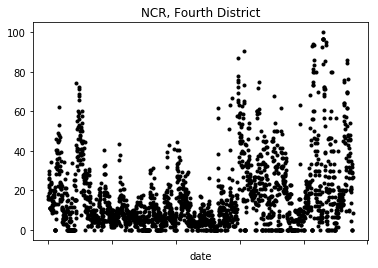

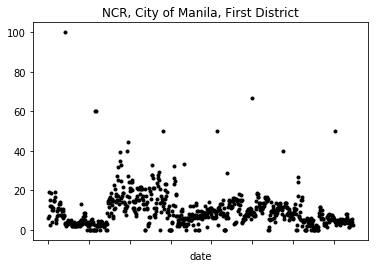

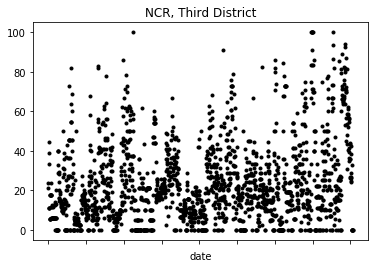

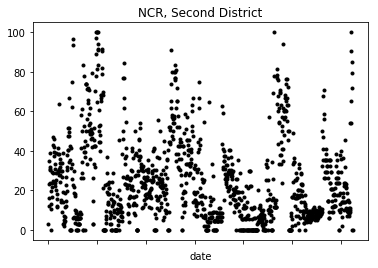

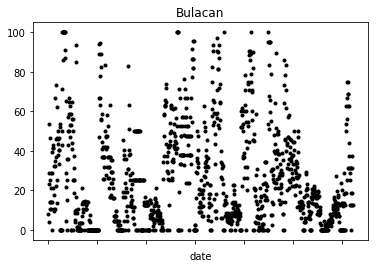

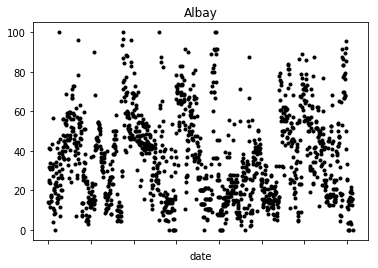

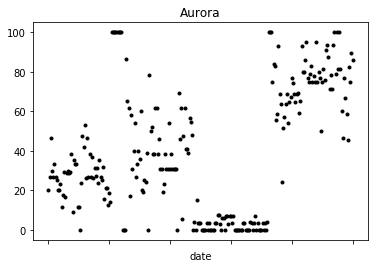

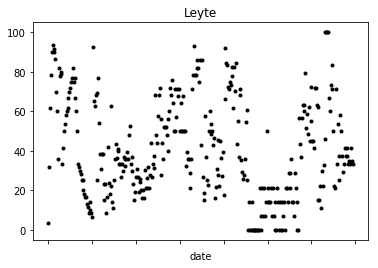

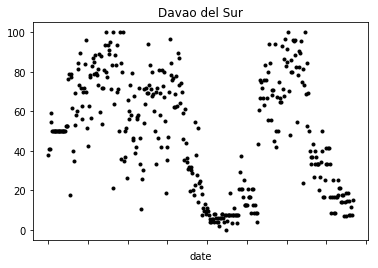

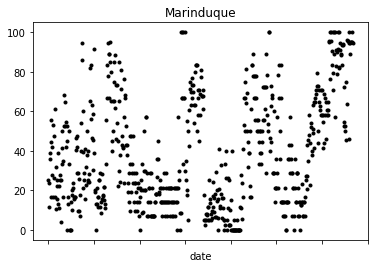

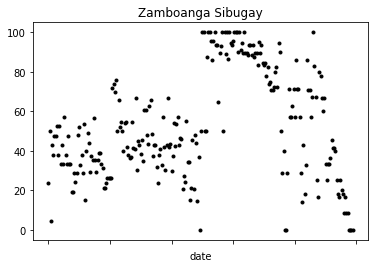

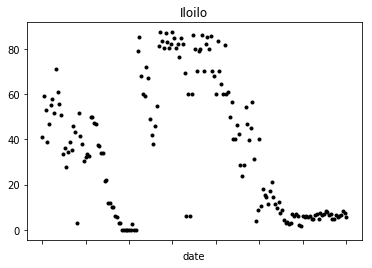

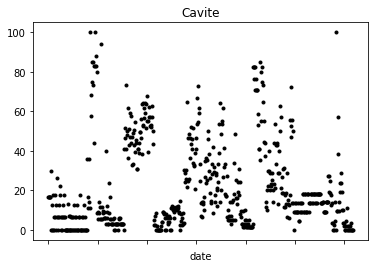

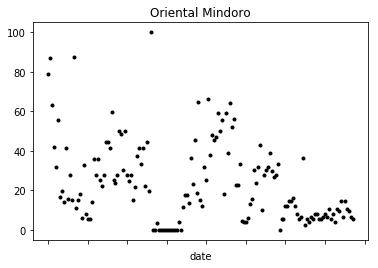

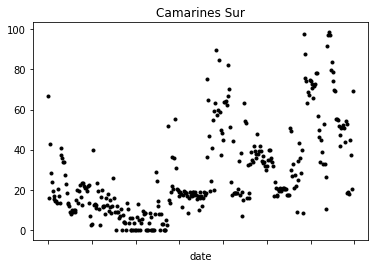

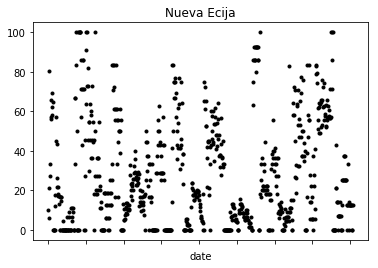

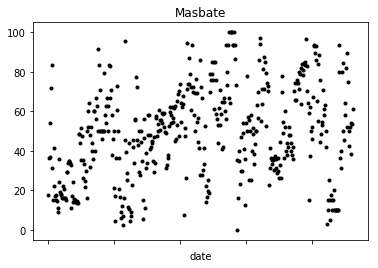

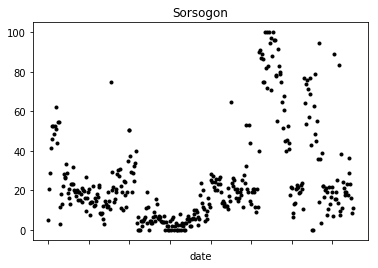

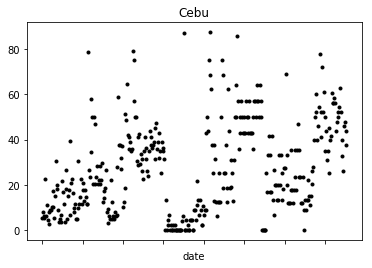

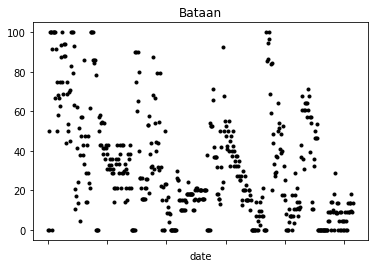

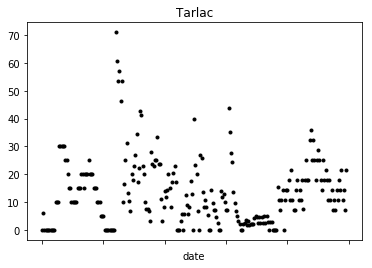

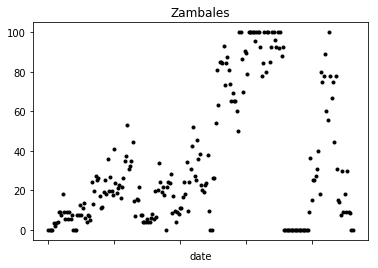

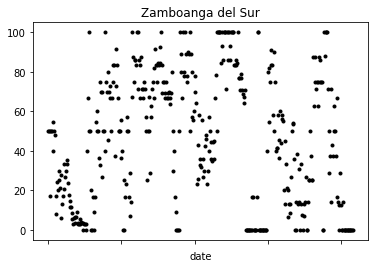

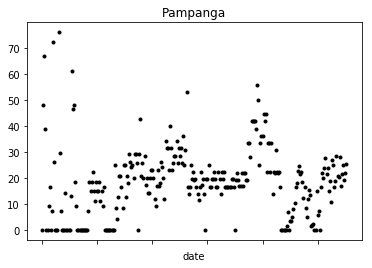

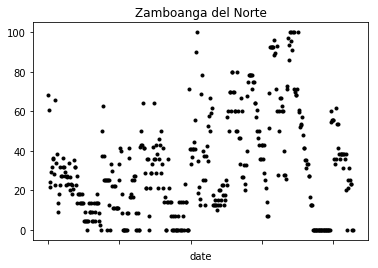

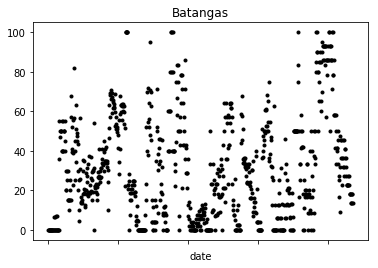

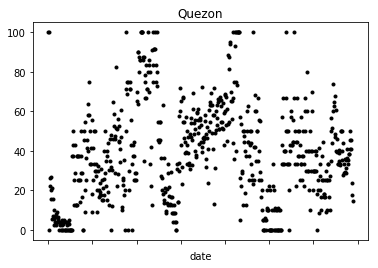

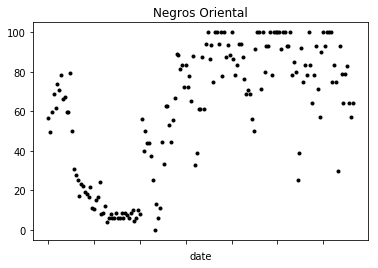

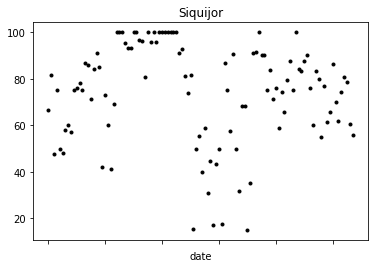

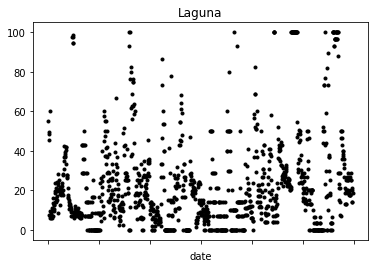

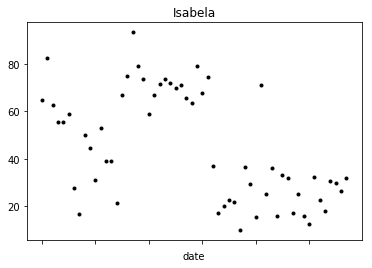

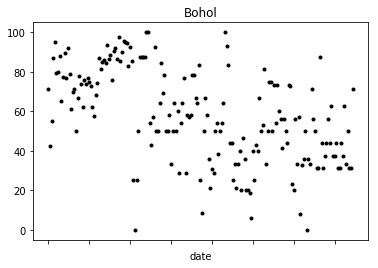

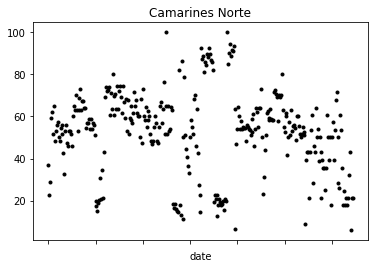

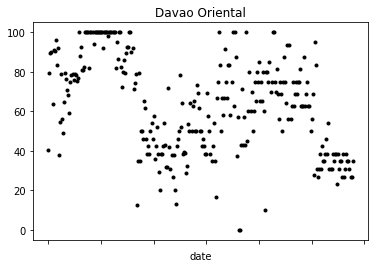

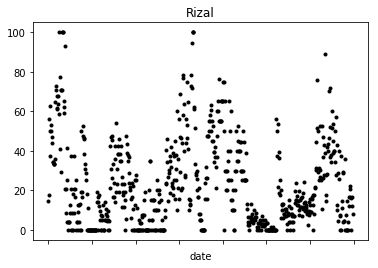

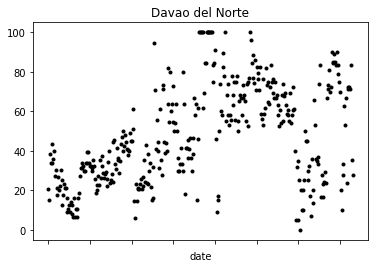

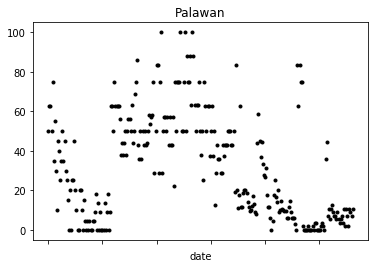

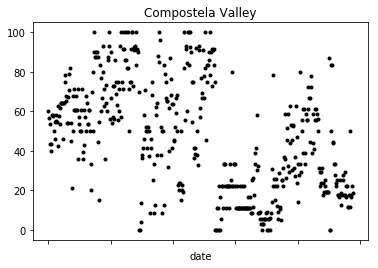

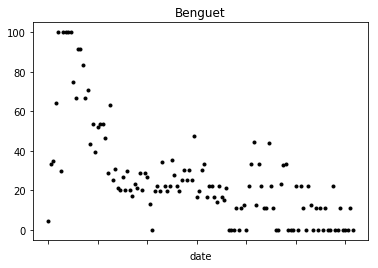

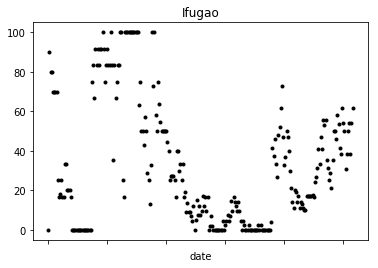

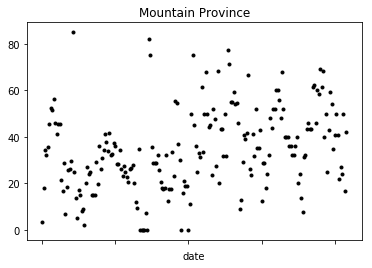

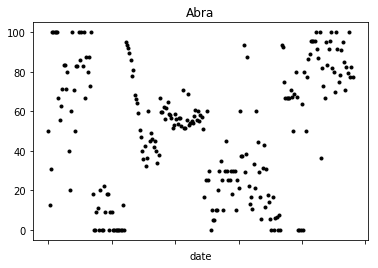

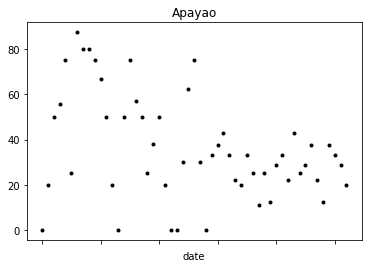

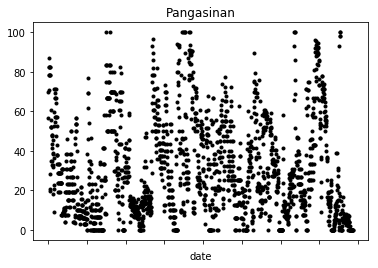

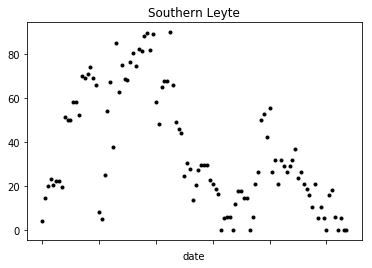

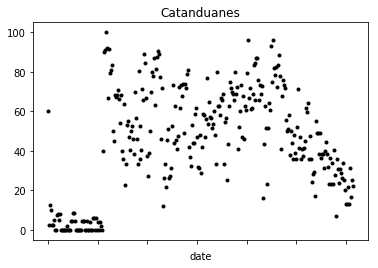

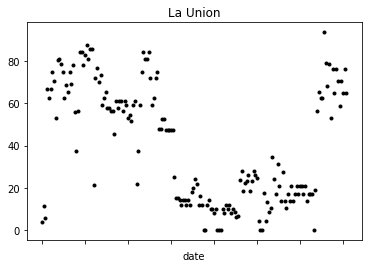

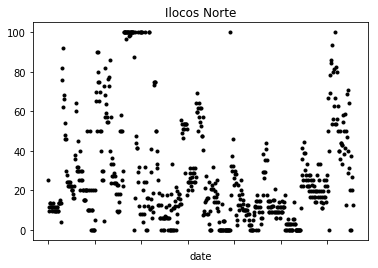

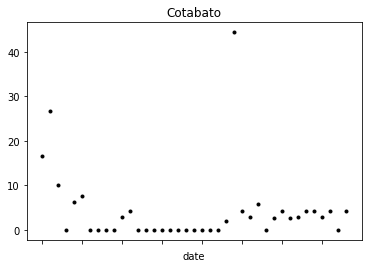

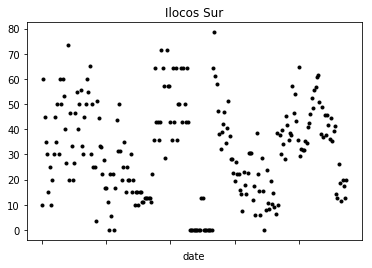

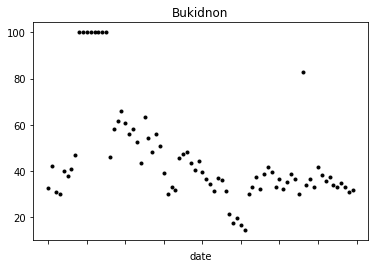

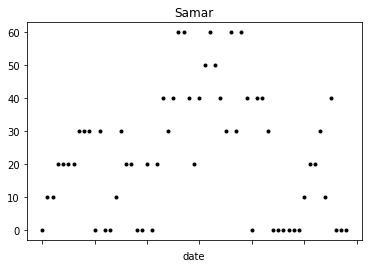

Number of missing provinces:  0


In [143]:
adm_list = df['adm'].unique().tolist()
i = 0
for province in adm_list:
    df_test = semifiltered_df[semifiltered_df['adm']==province]
    df_test = df_test.set_index(['date'])
    try:
        df_test['value'].plot(style='k.')
        plt.title(province)
        plt.show()
    except:
        print("An exception occurred")
        i= i +1 
print('Number of missing provinces: ', i)

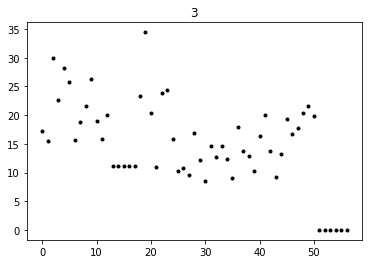

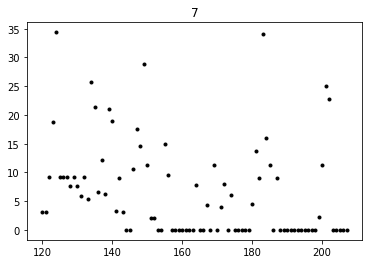

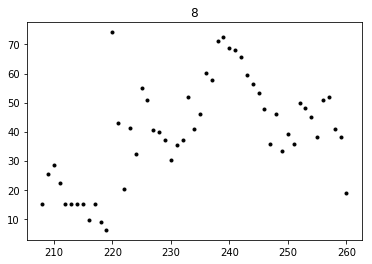

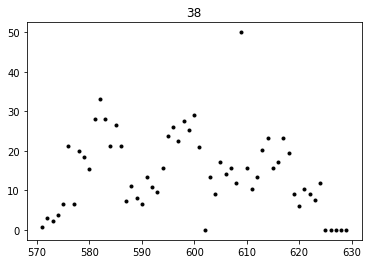

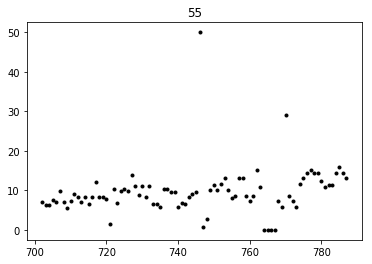

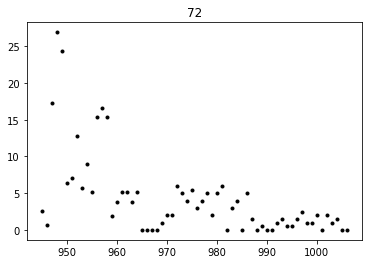

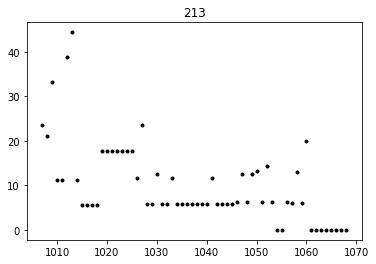

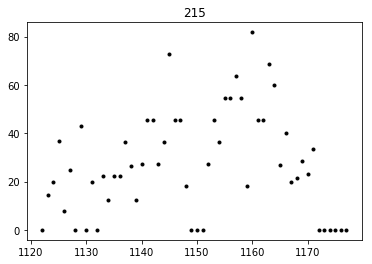

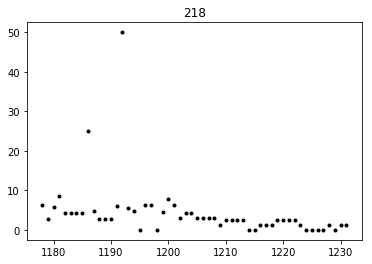

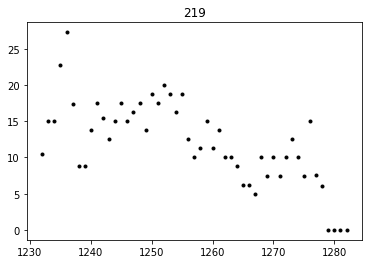

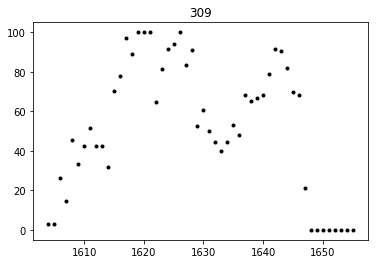

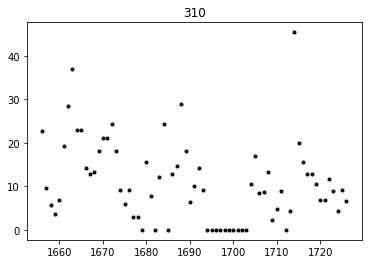

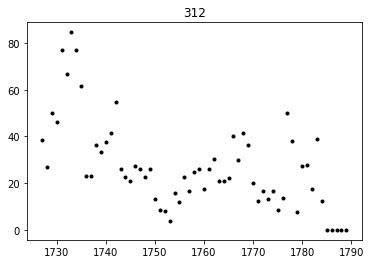

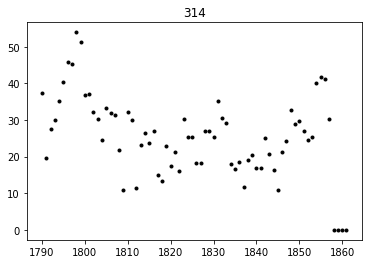

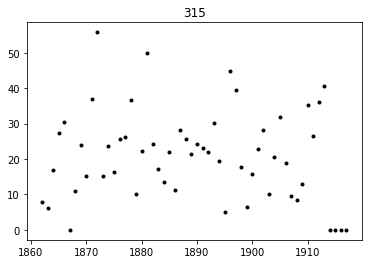

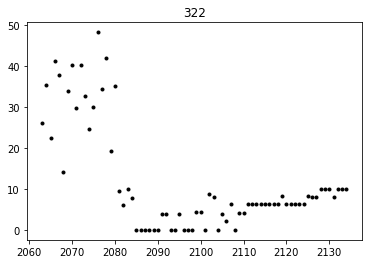

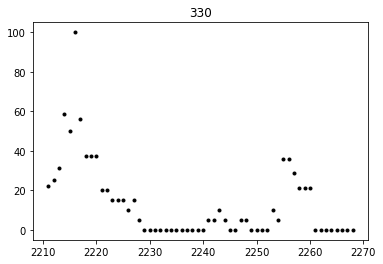

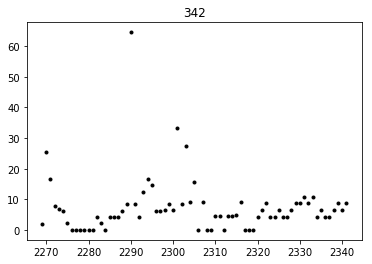

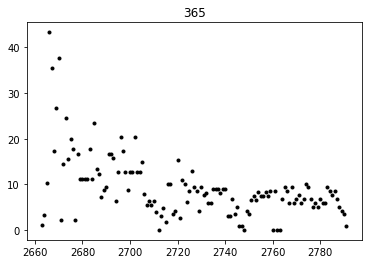

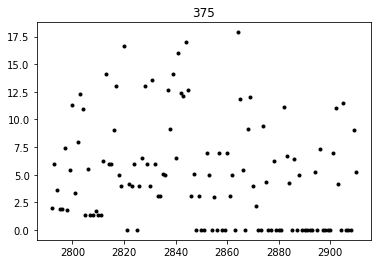

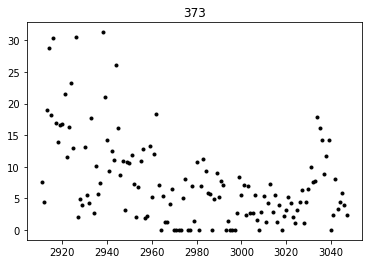

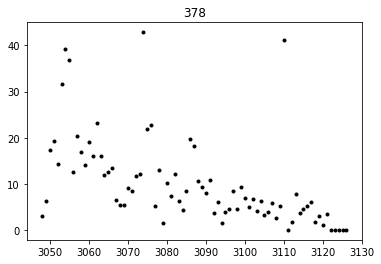

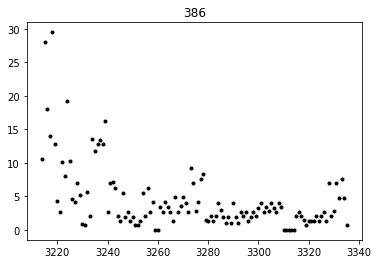

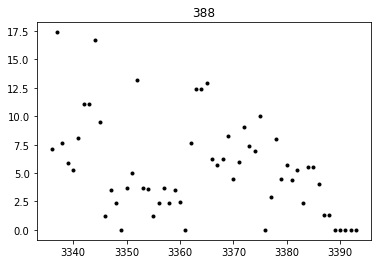

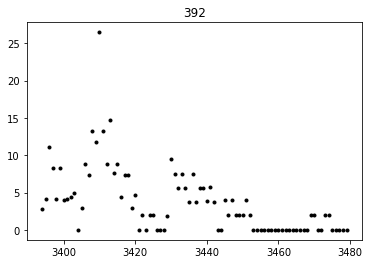

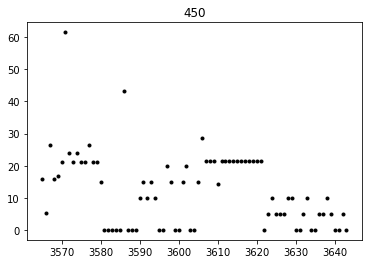

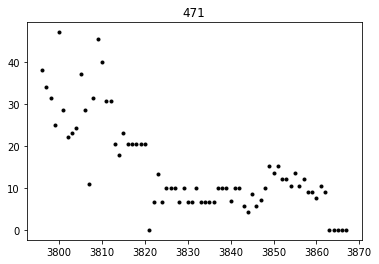

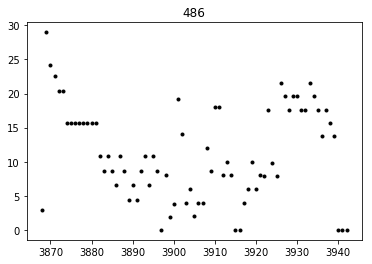

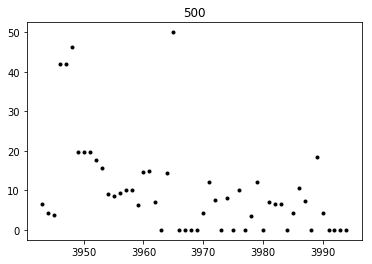

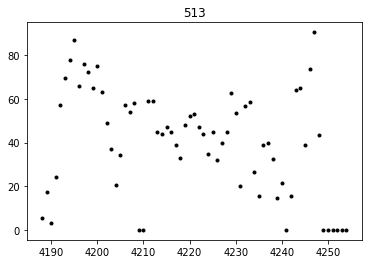

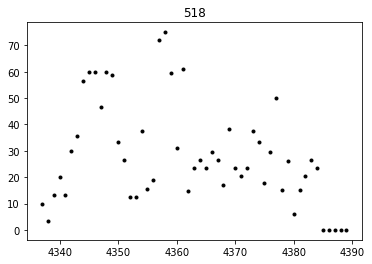

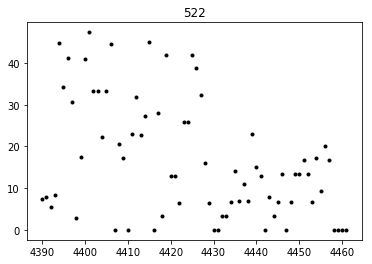

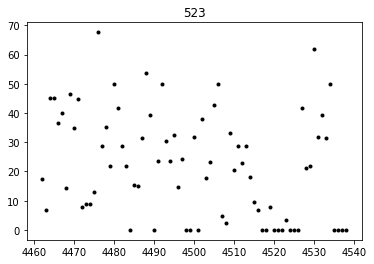

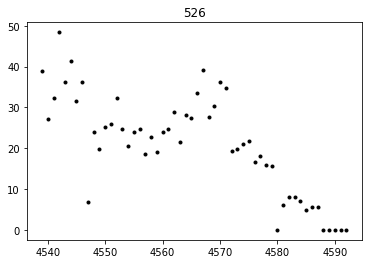

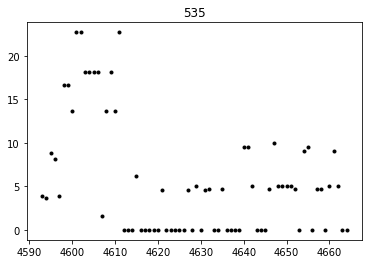

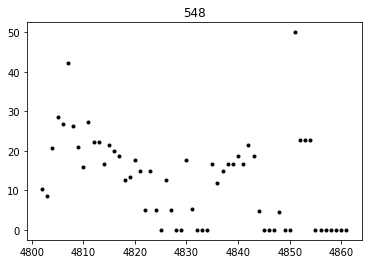

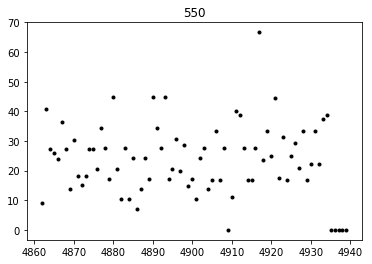

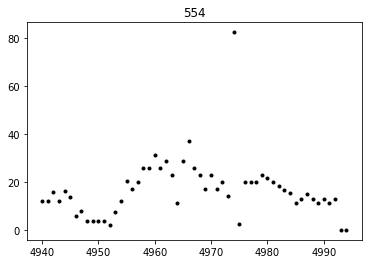

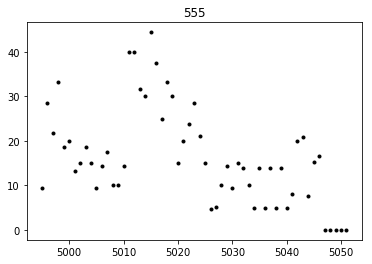

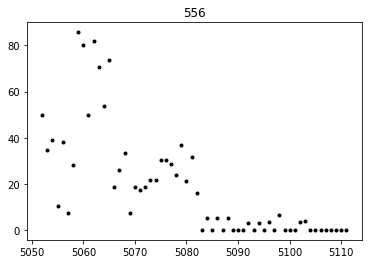

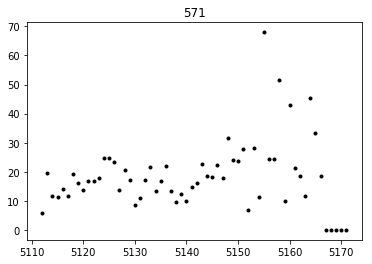

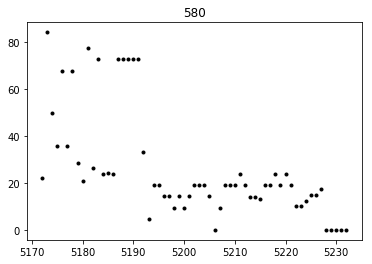

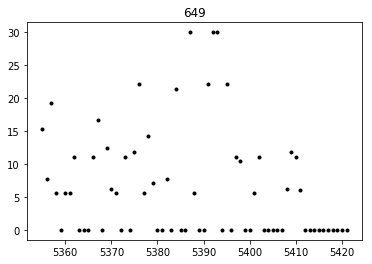

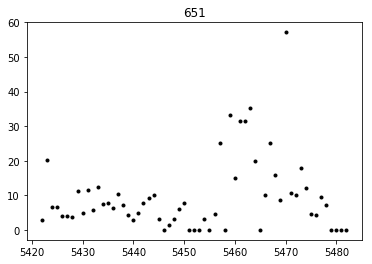

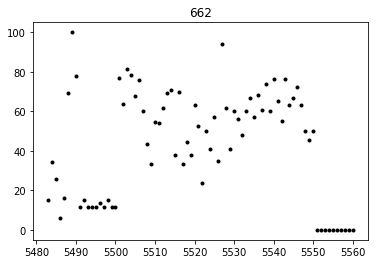

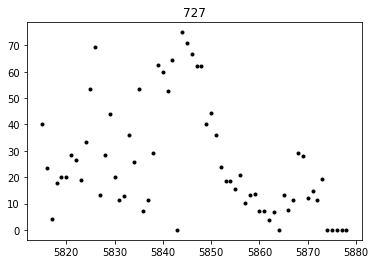

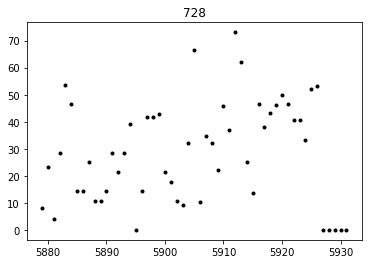

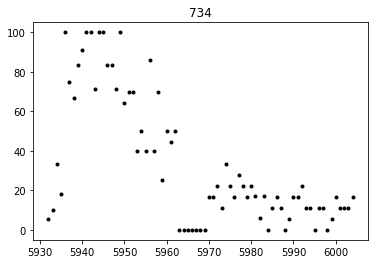

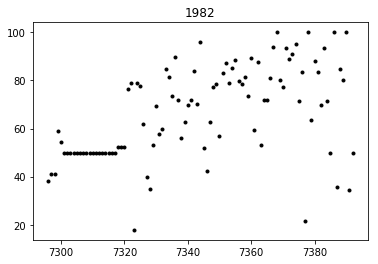

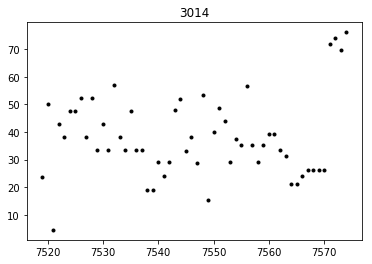

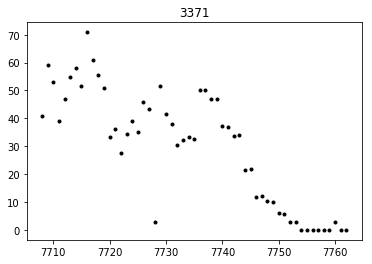

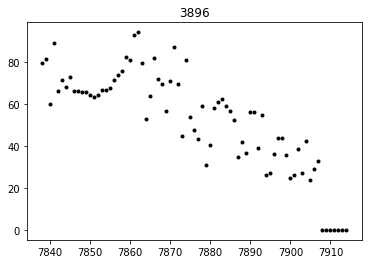

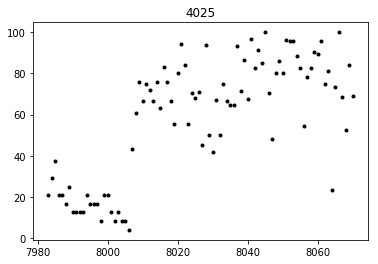

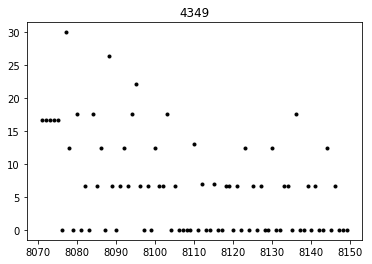

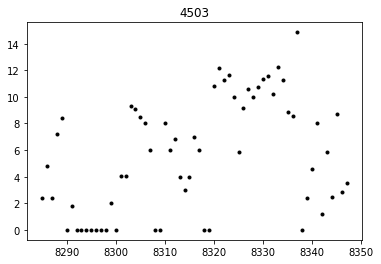

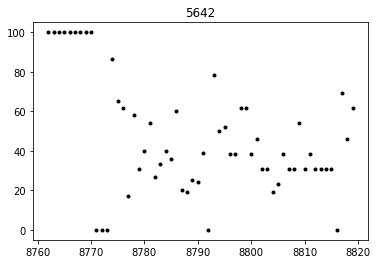

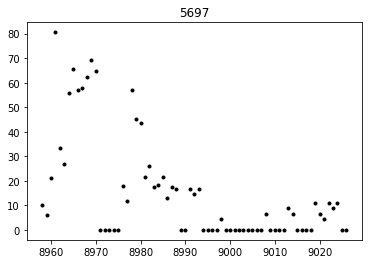

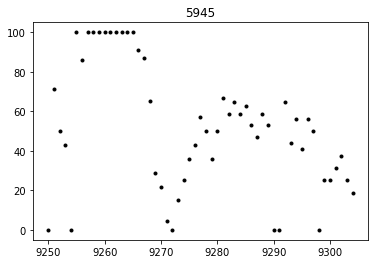

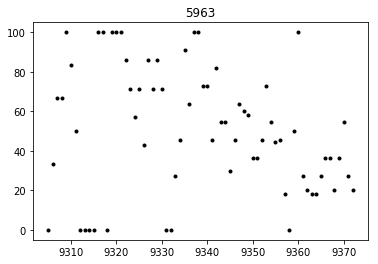

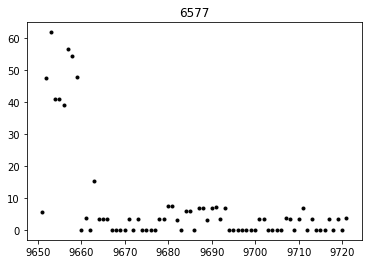

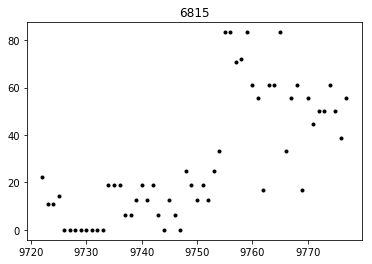

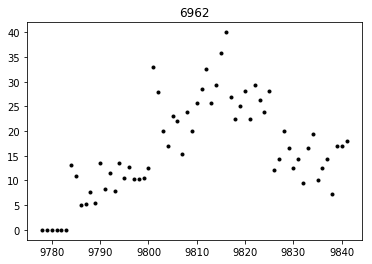

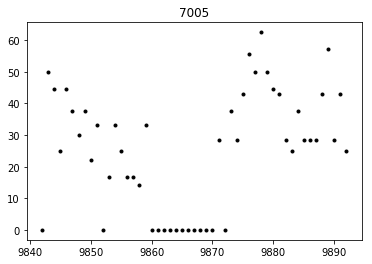

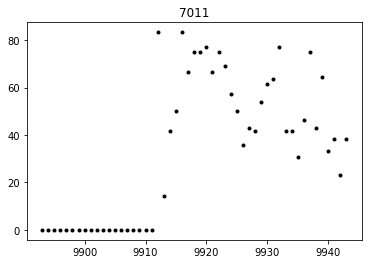

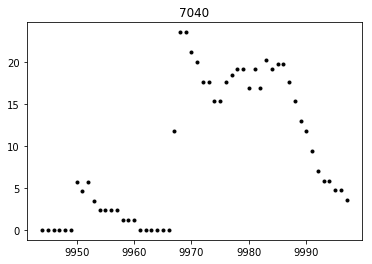

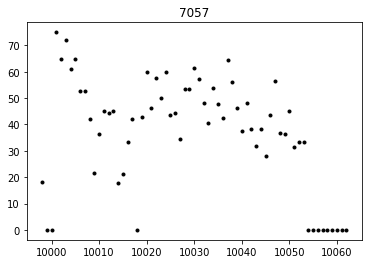

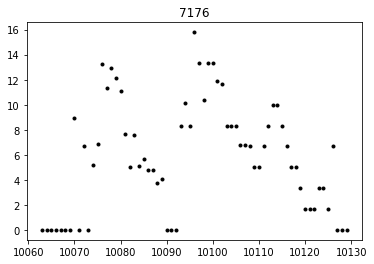

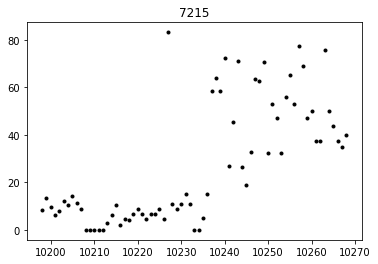

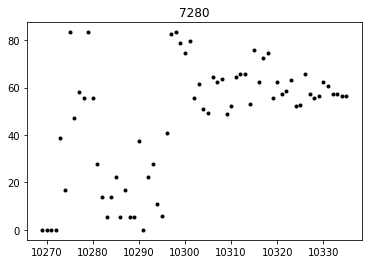

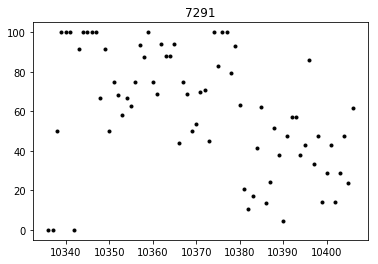

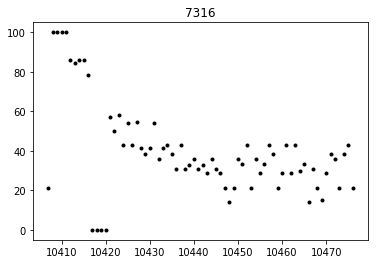

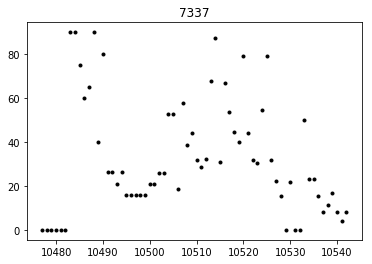

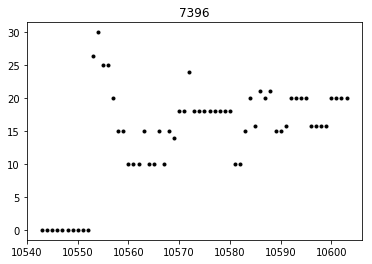

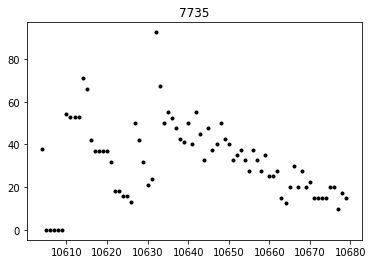

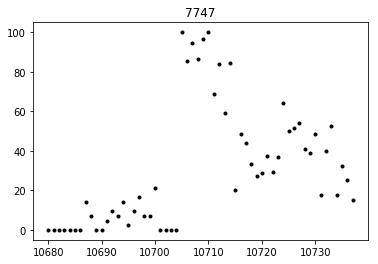

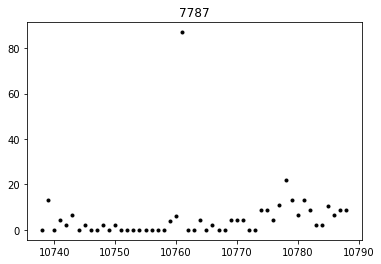

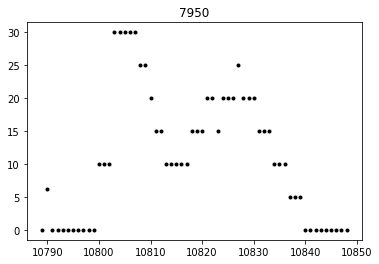

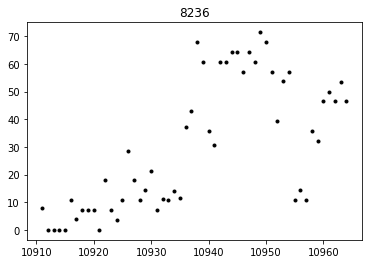

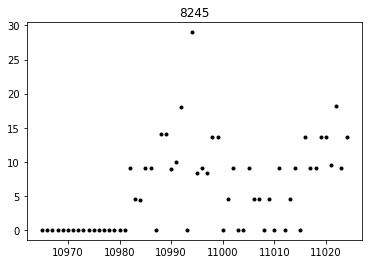

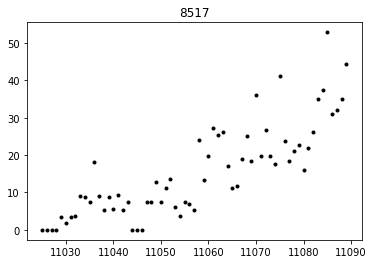

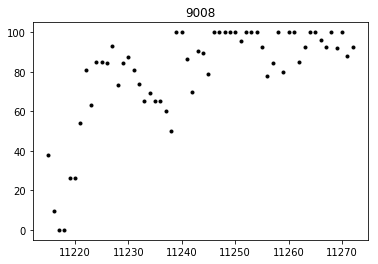

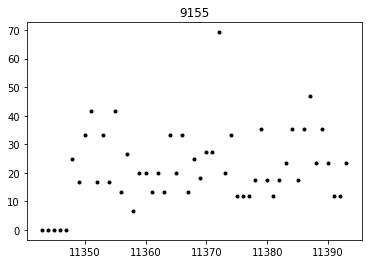

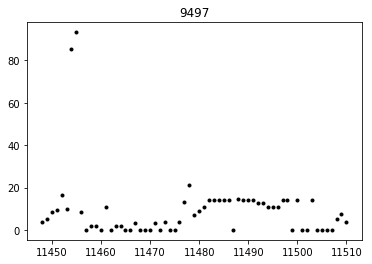

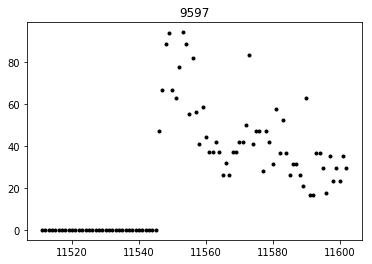

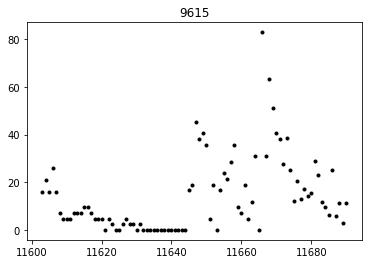

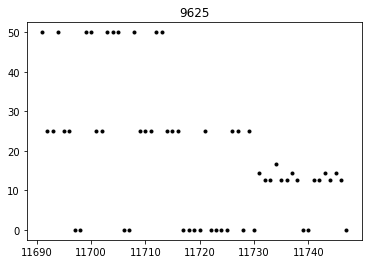

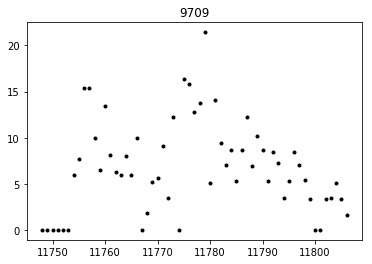

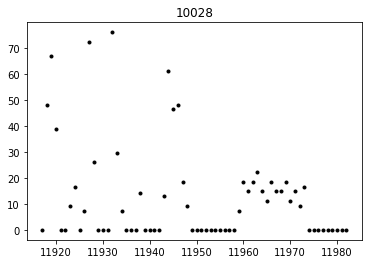

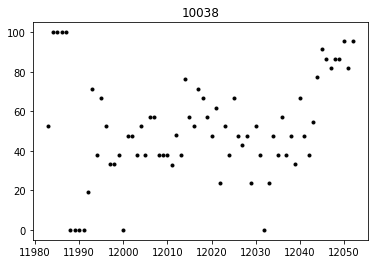

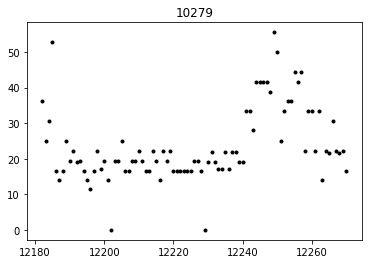

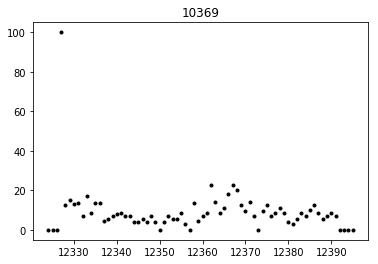

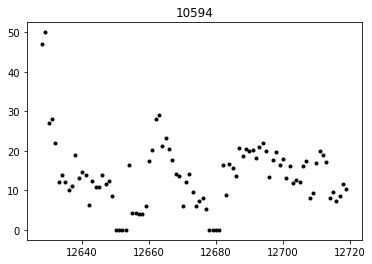

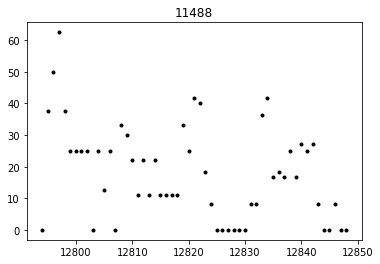

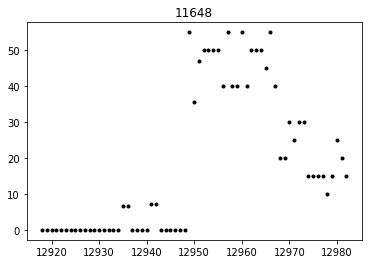

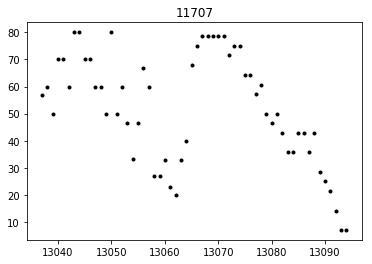

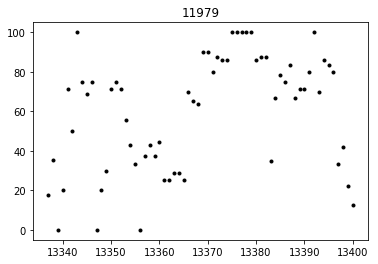

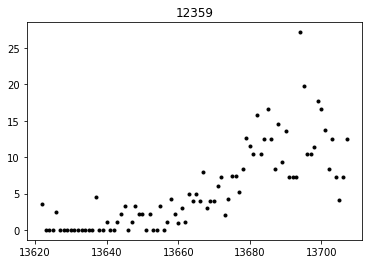

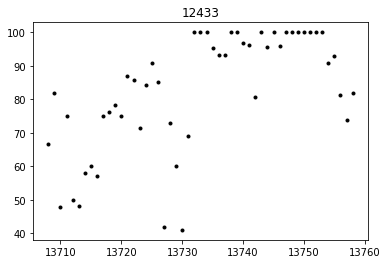

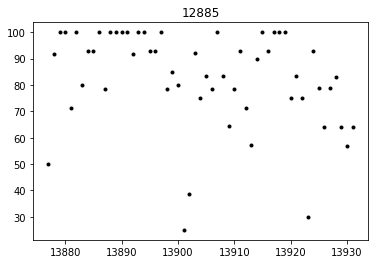

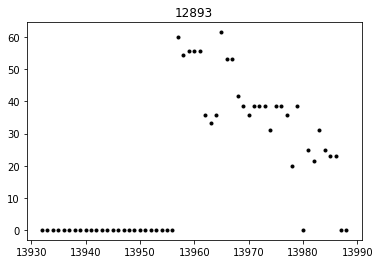

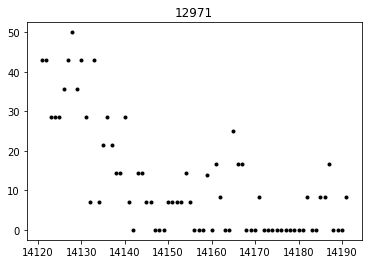

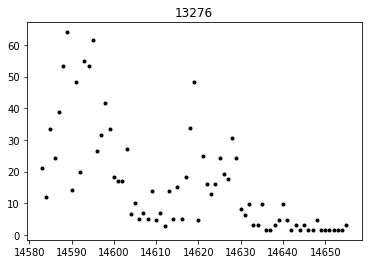

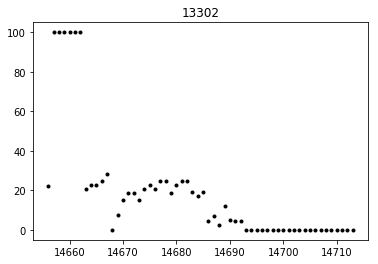

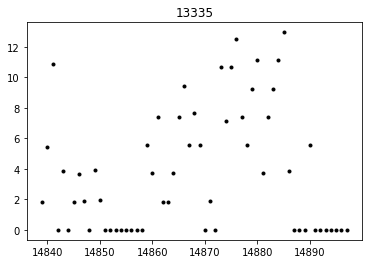

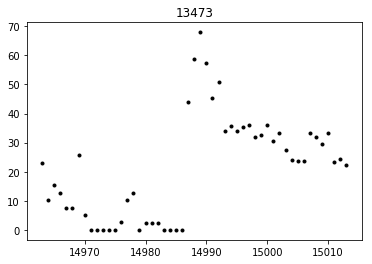

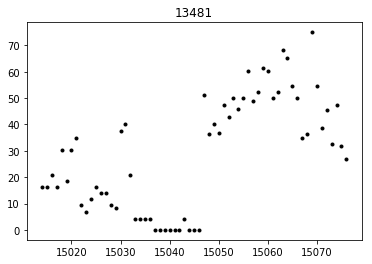

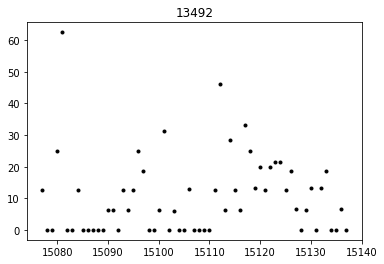

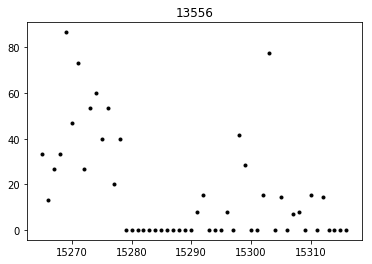

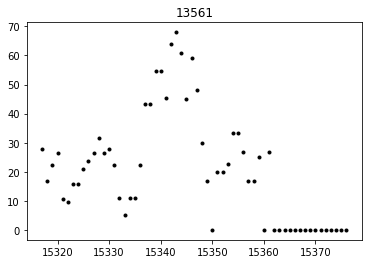

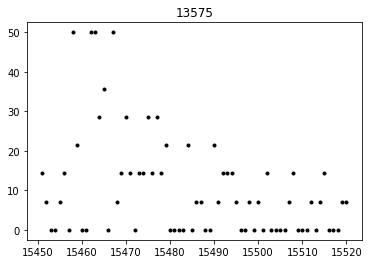

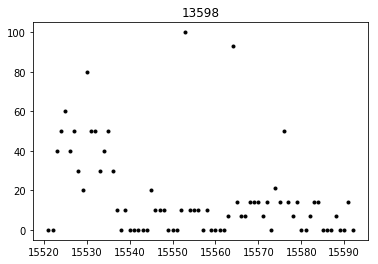

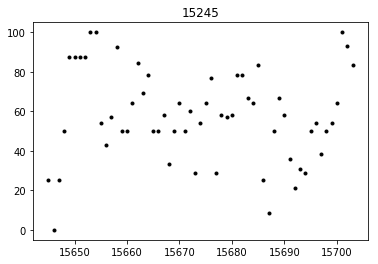

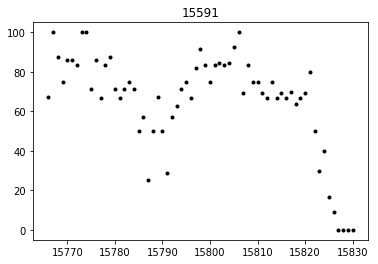

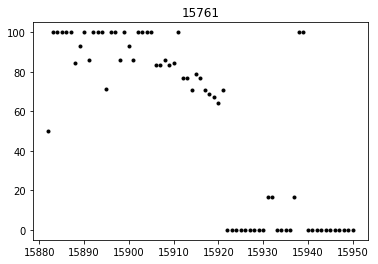

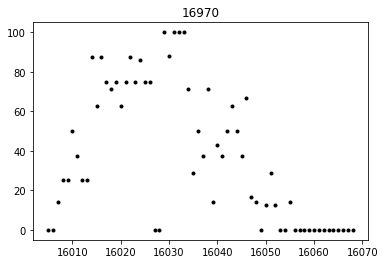

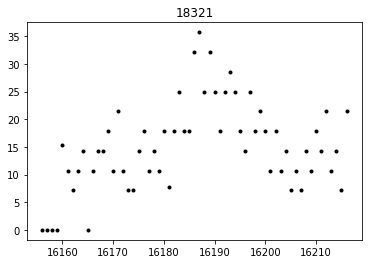

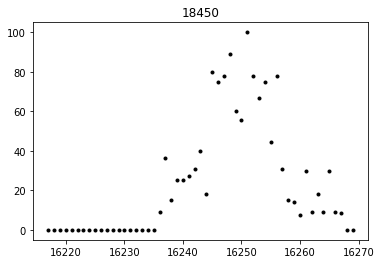

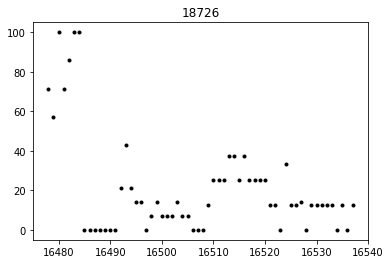

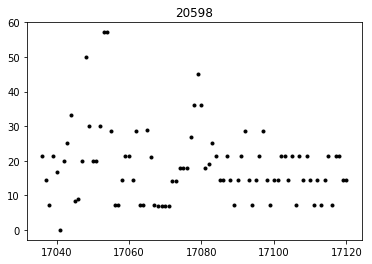

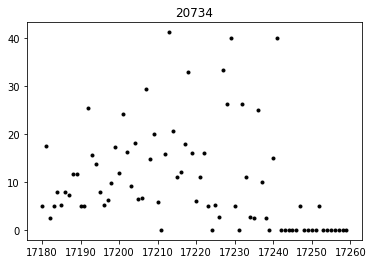

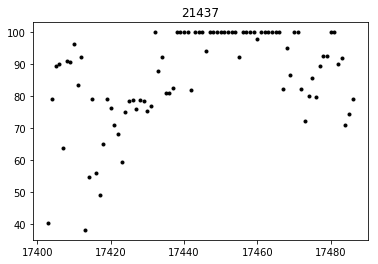

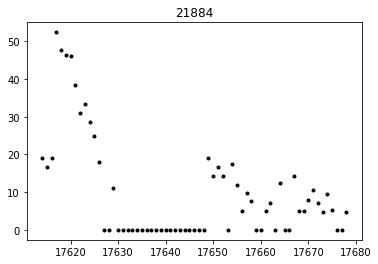

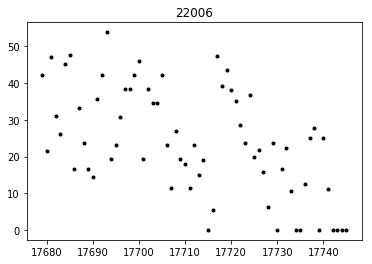

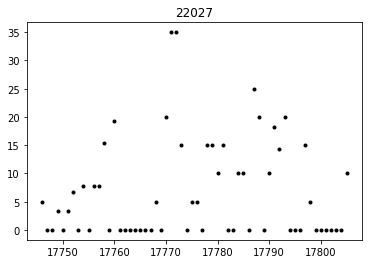

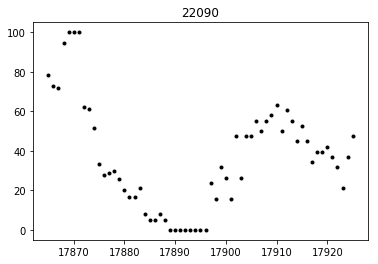

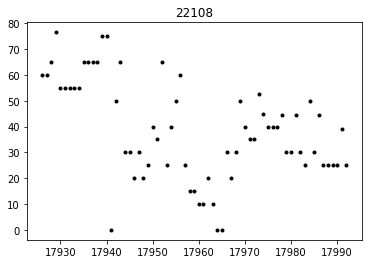

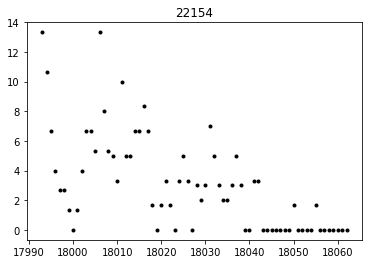

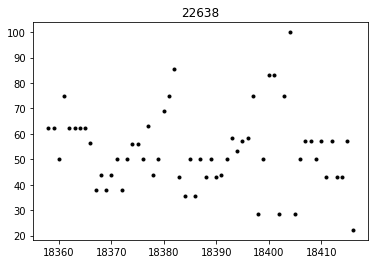

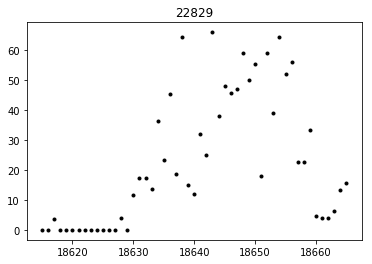

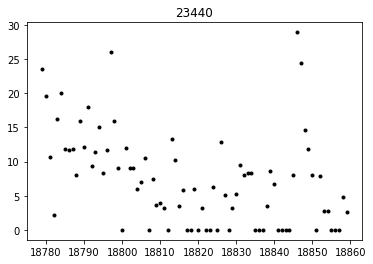

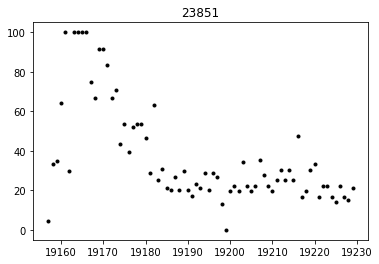

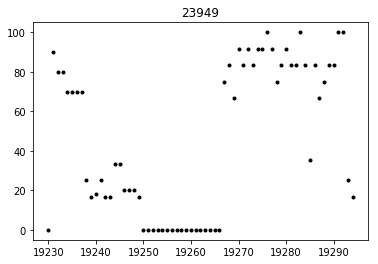

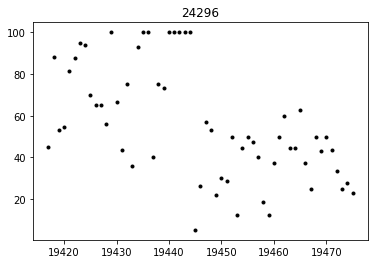

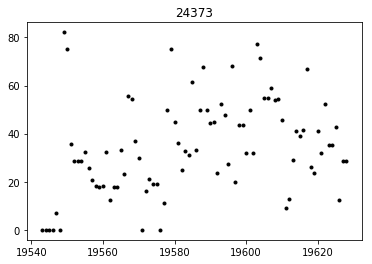

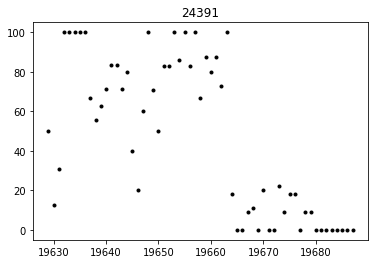

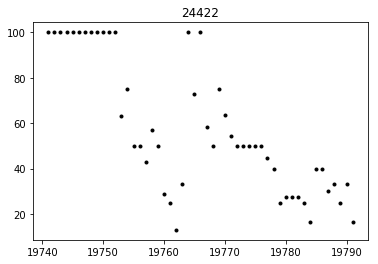

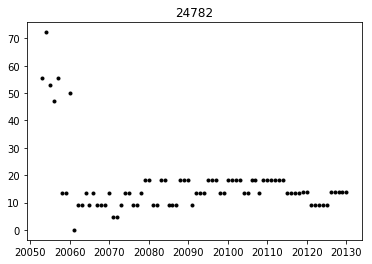

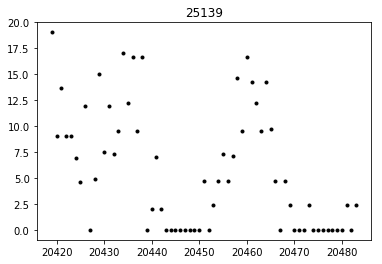

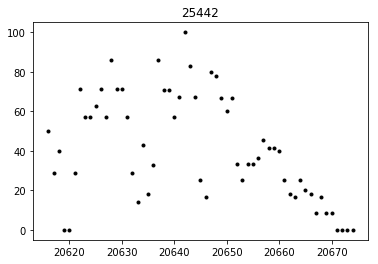

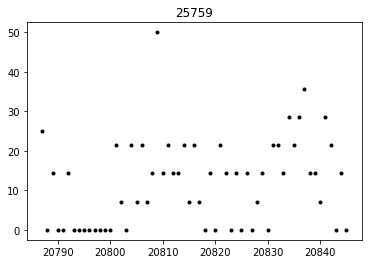

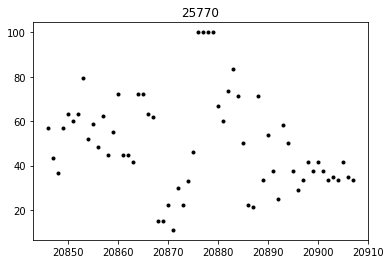

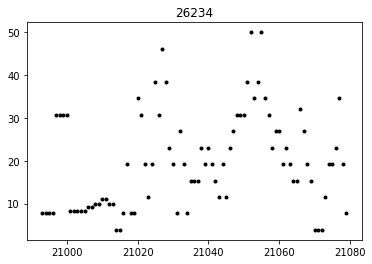

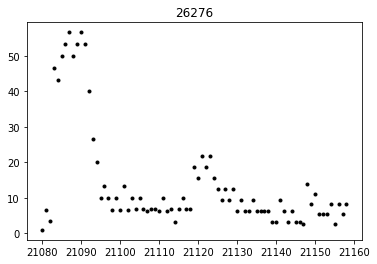

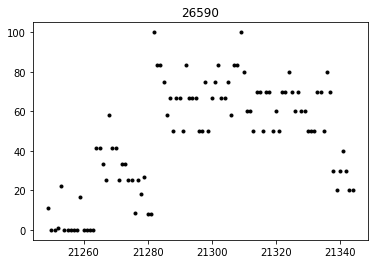

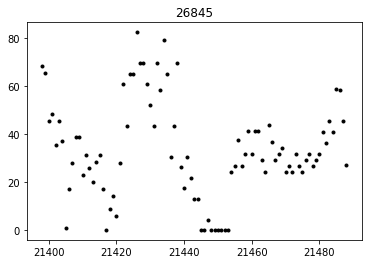

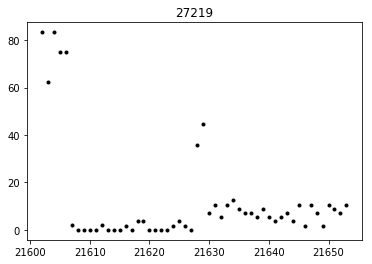

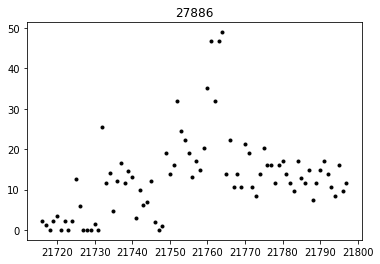

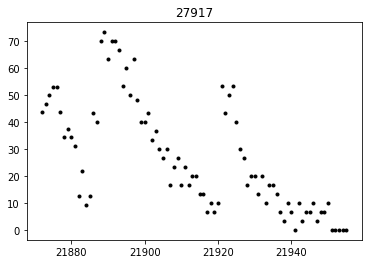

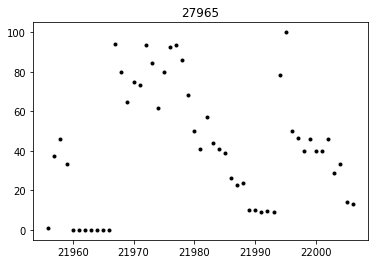

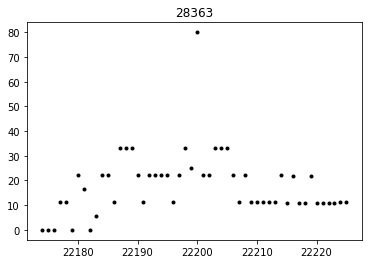

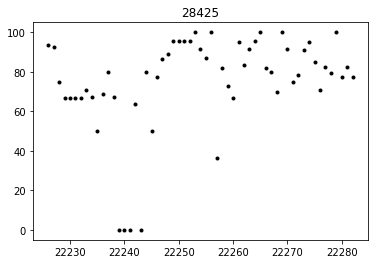

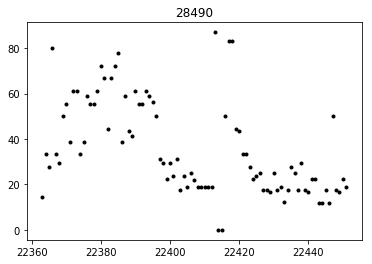

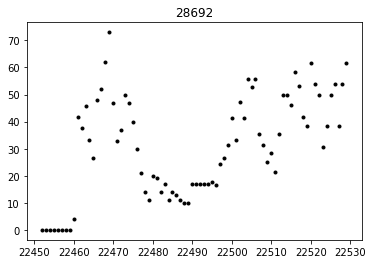

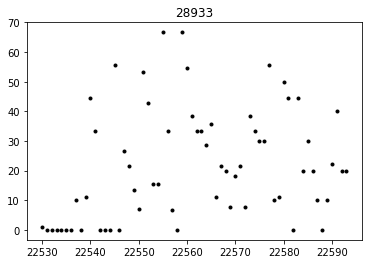

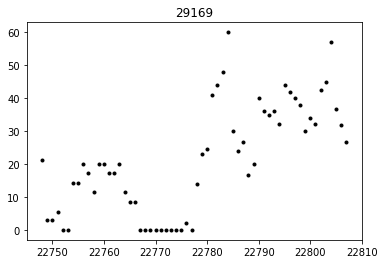

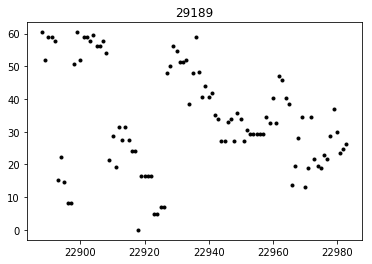

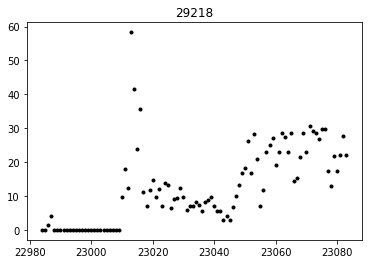

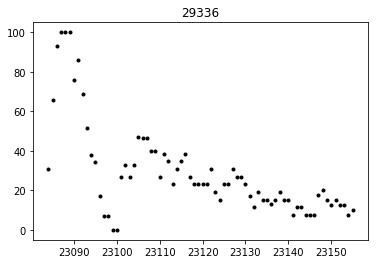

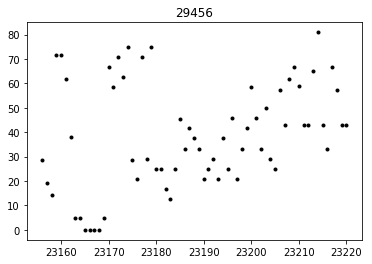

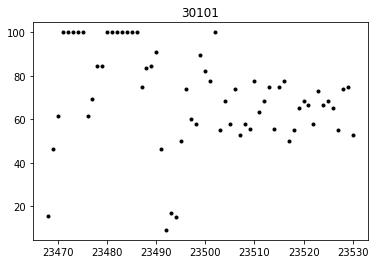

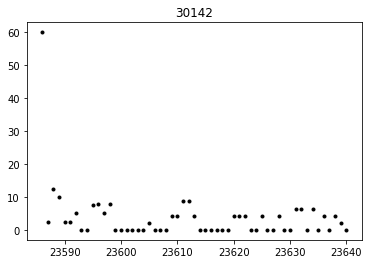

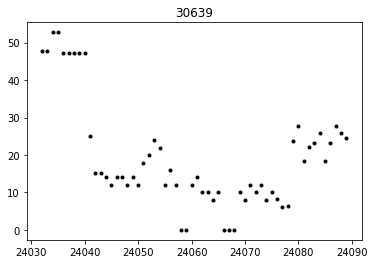

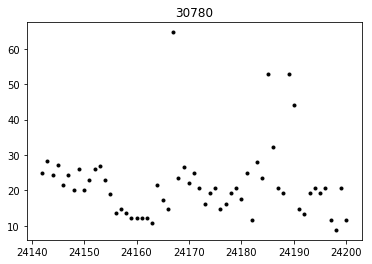

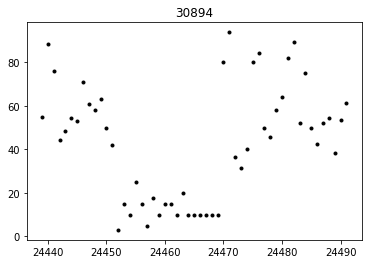

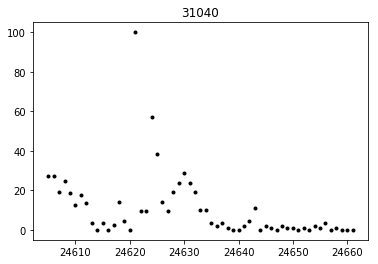

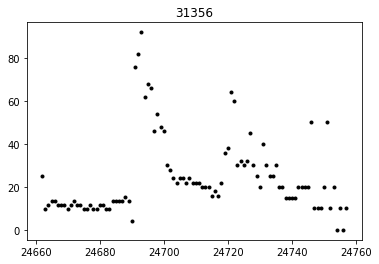

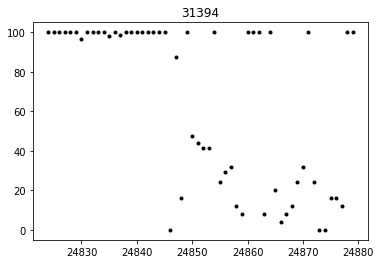

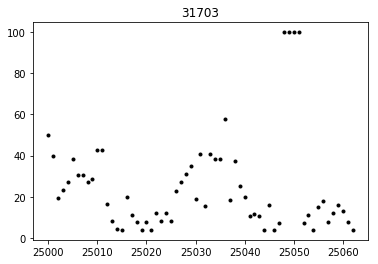

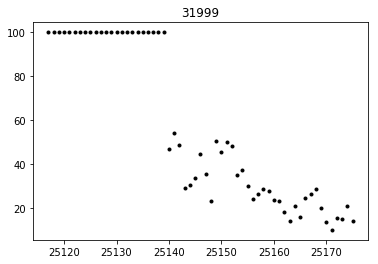

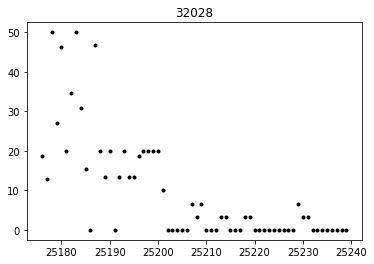

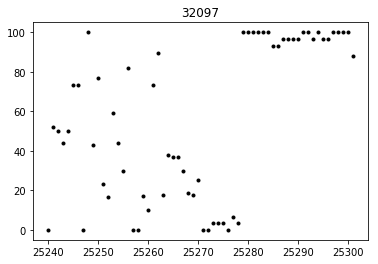

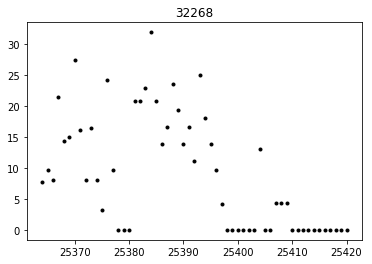

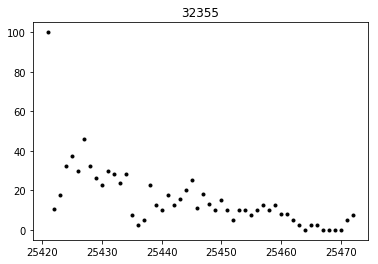

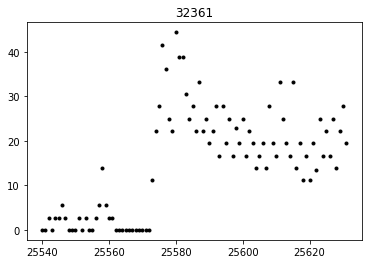

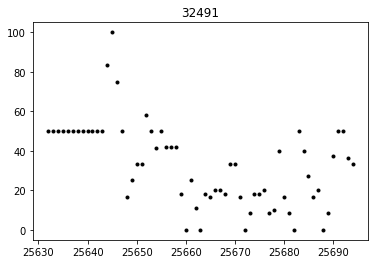

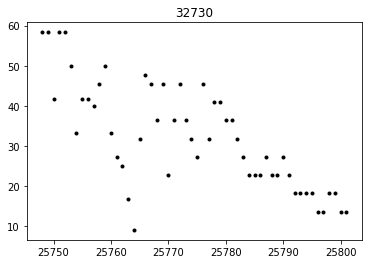

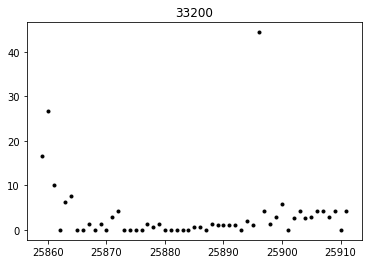

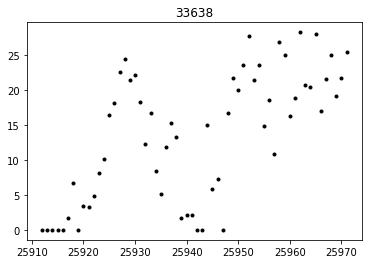

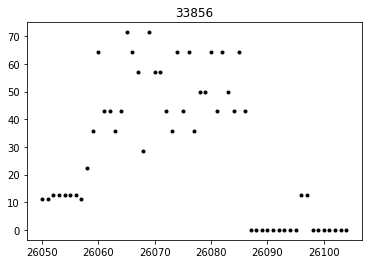

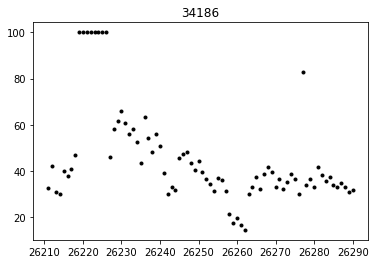

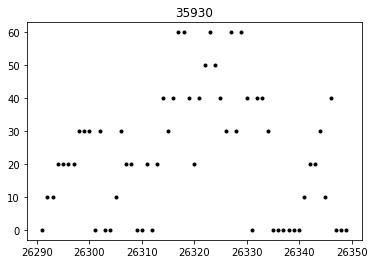

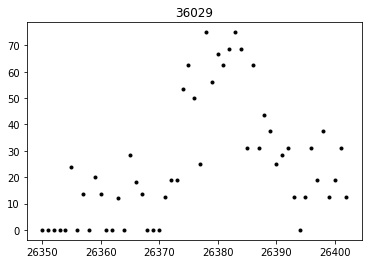

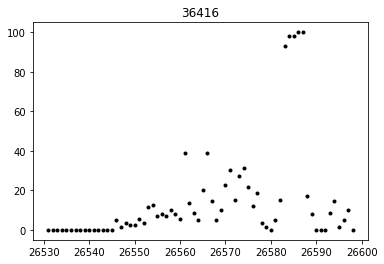

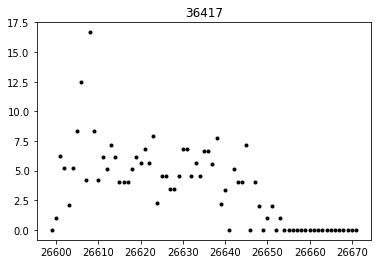

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
# Plot OviTrap index per school for a certain district

for school in recurring_df['id'].unique().tolist():
    df_school = recurring_df[recurring_df['id']==school]
    df_school['value'].plot(style='k.')
    plt.title(school)
    plt.set_ylim=(0, 100)
    plt.show()

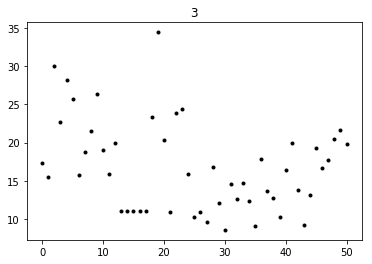

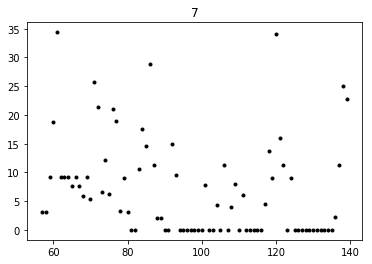

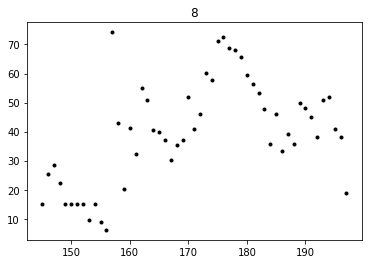

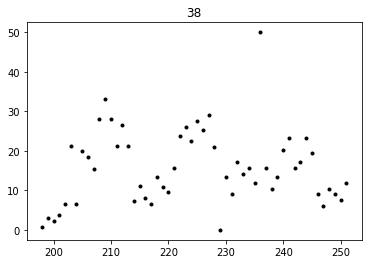

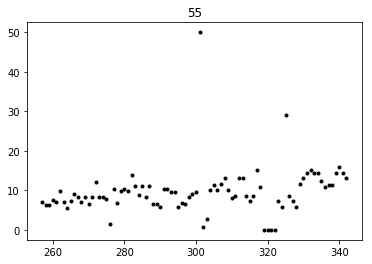

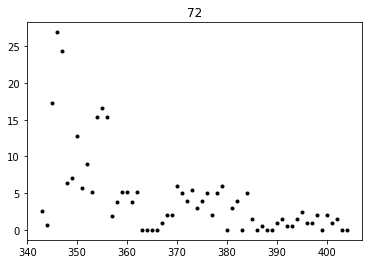

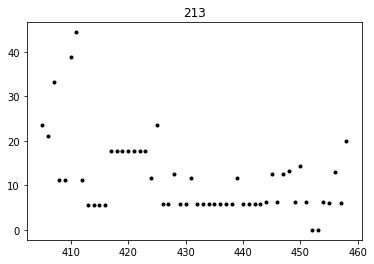

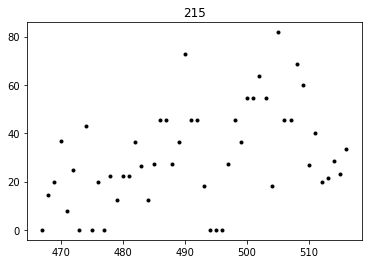

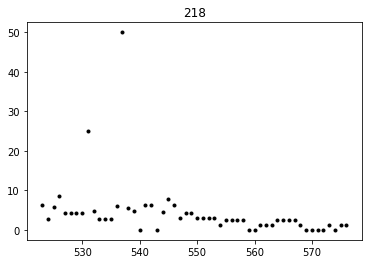

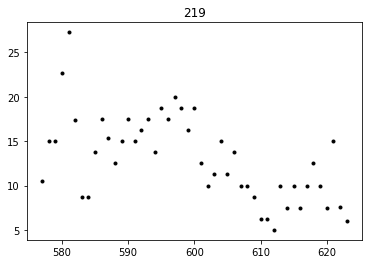

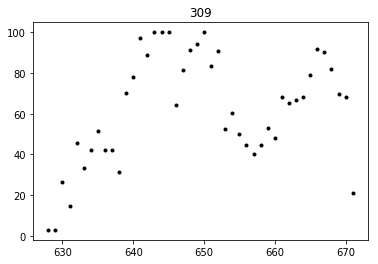

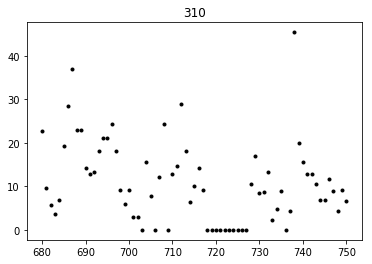

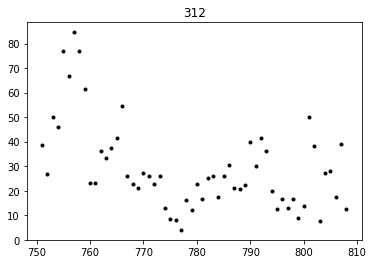

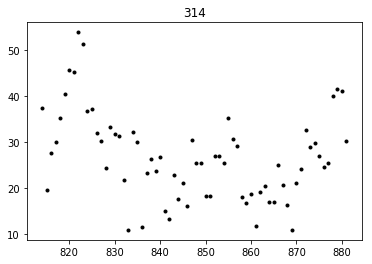

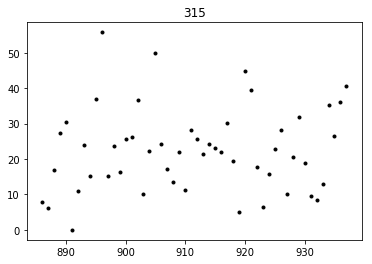

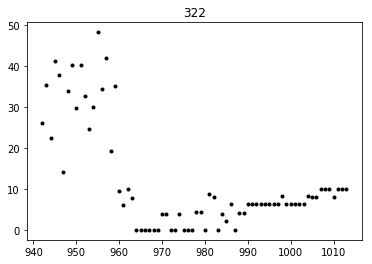

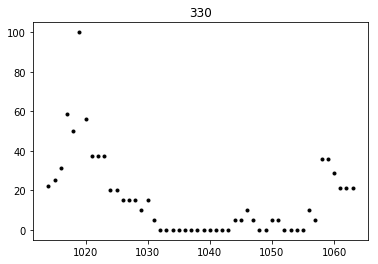

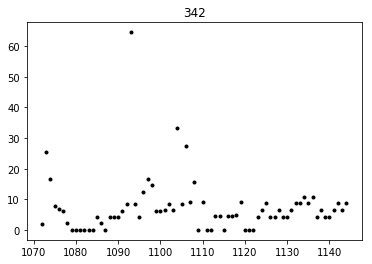

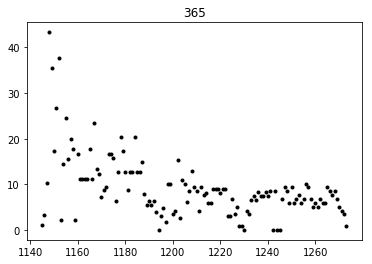

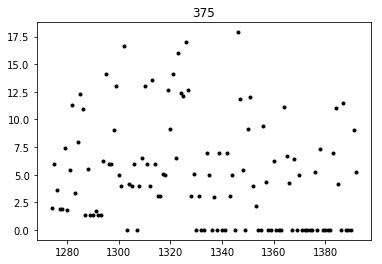

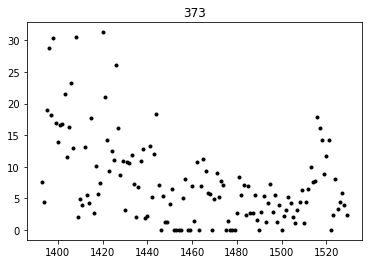

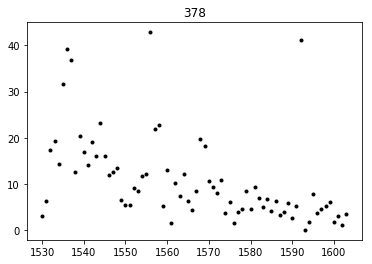

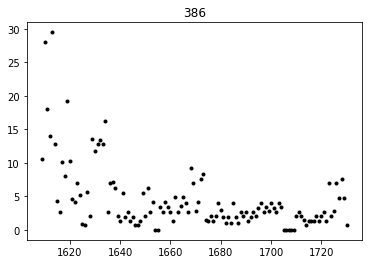

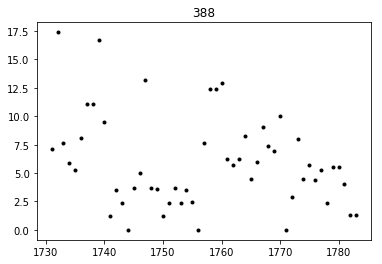

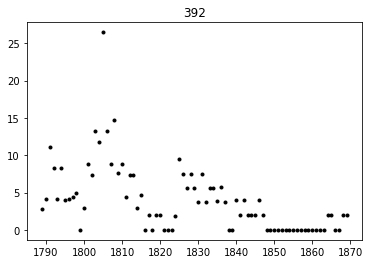

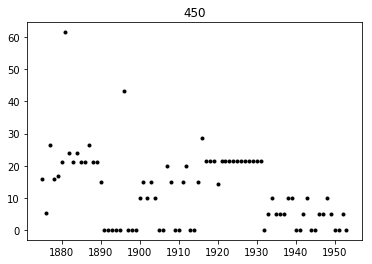

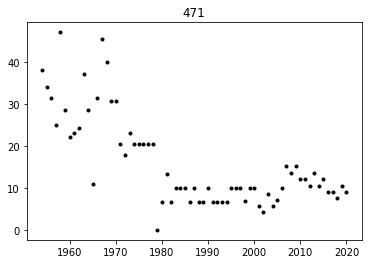

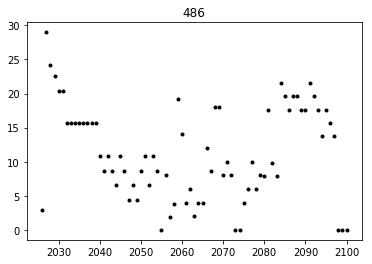

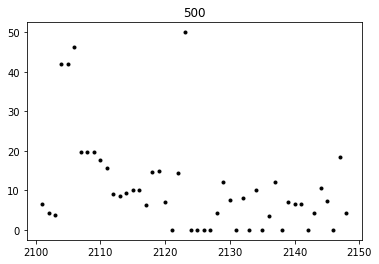

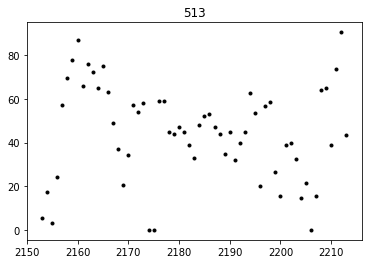

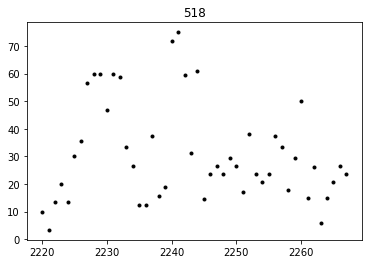

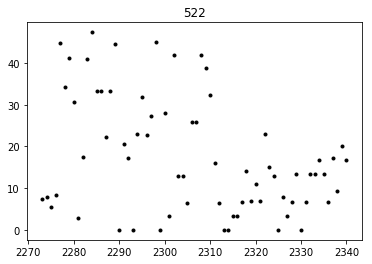

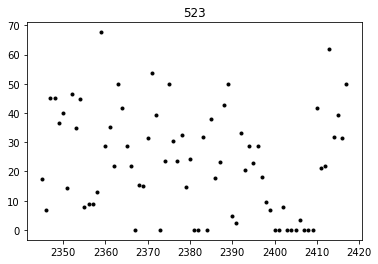

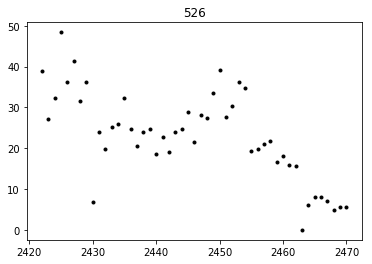

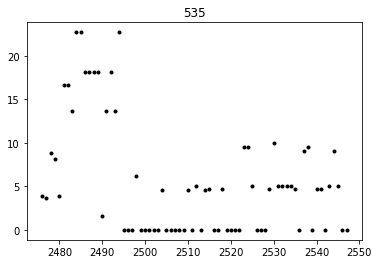

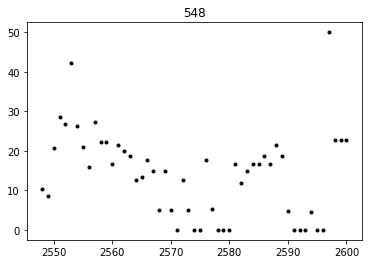

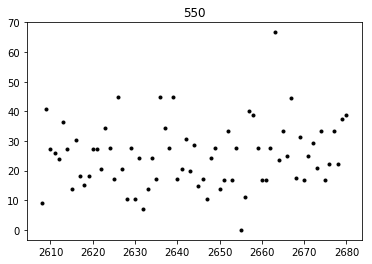

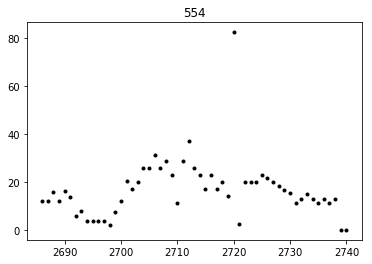

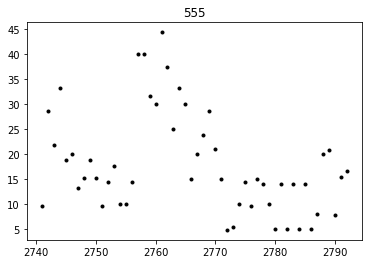

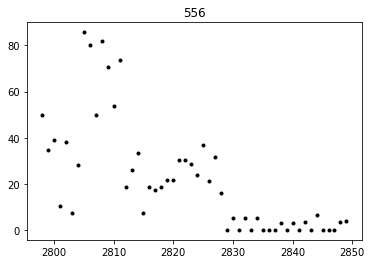

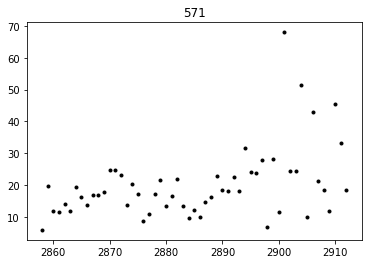

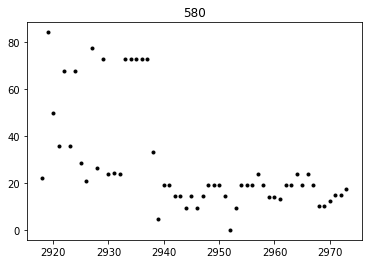

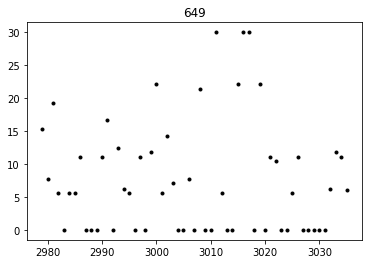

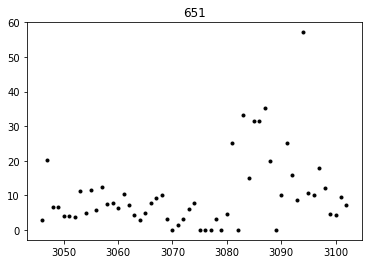

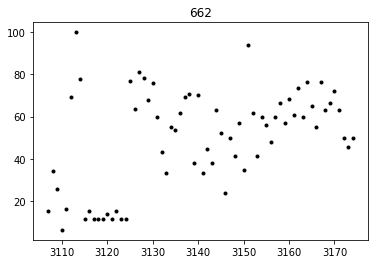

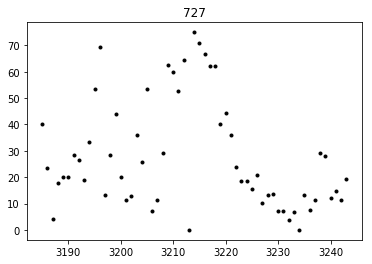

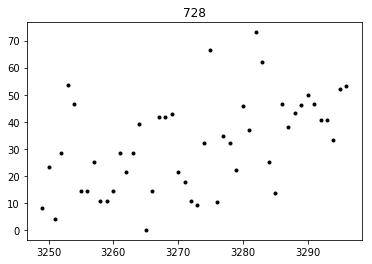

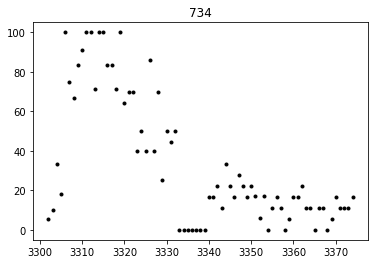

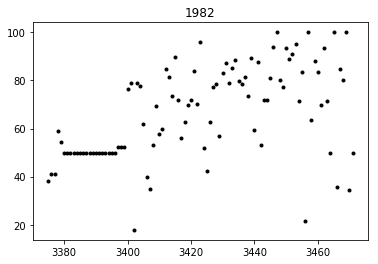

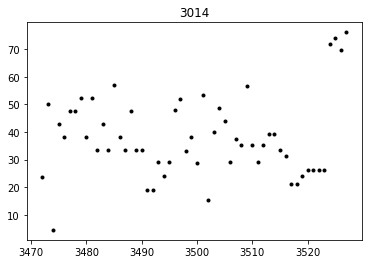

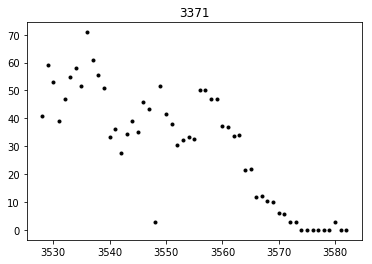

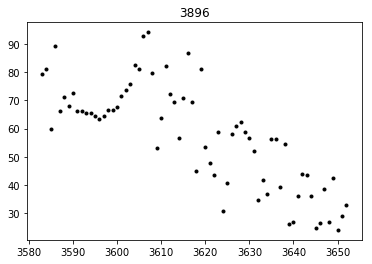

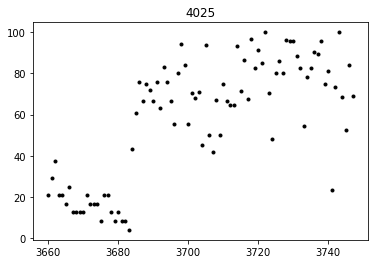

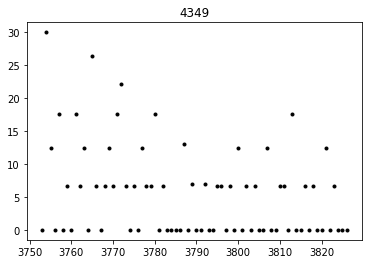

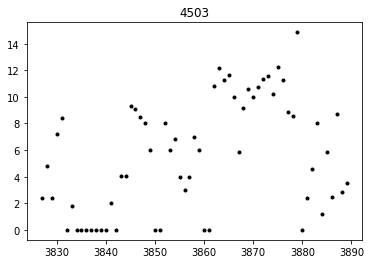

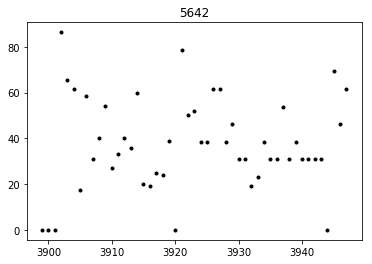

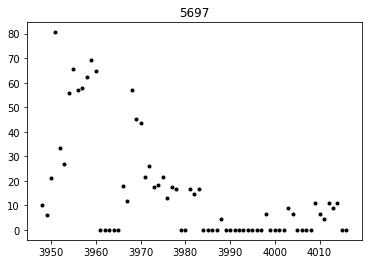

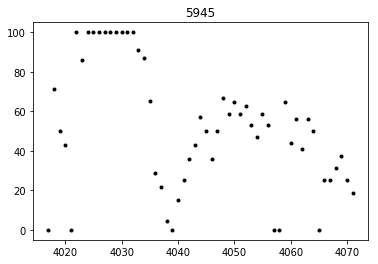

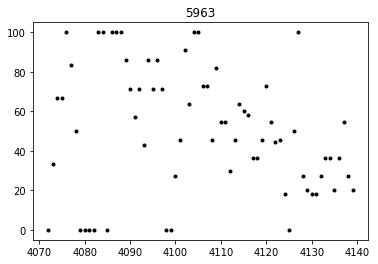

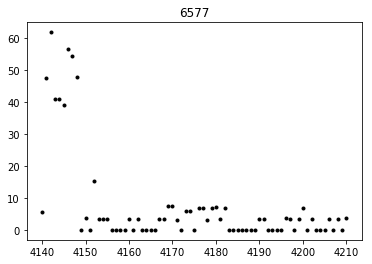

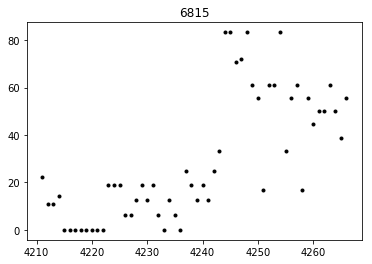

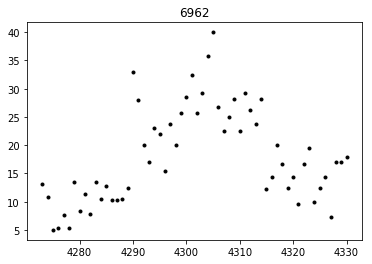

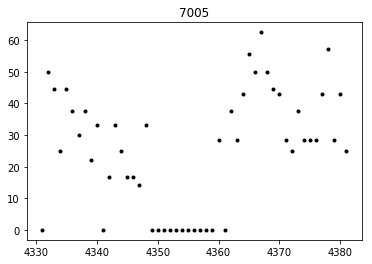

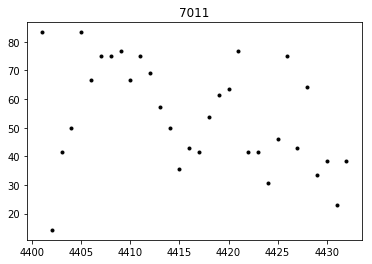

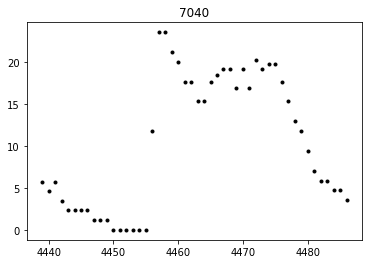

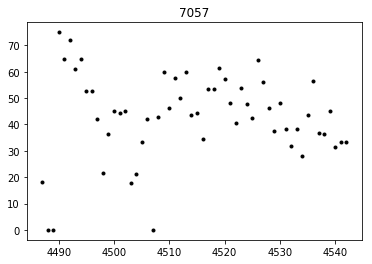

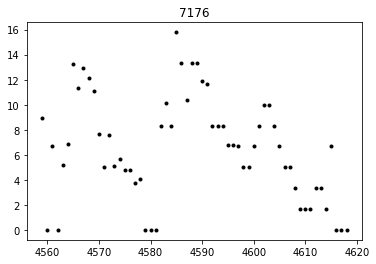

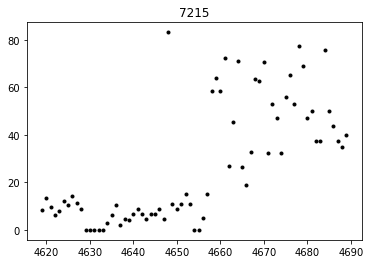

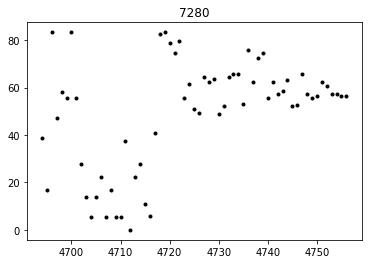

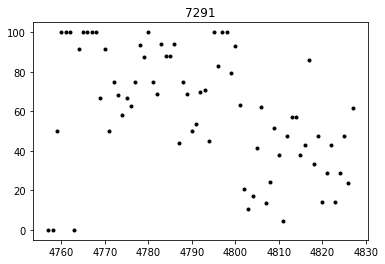

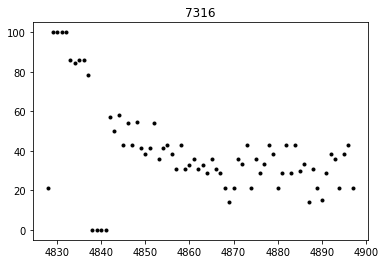

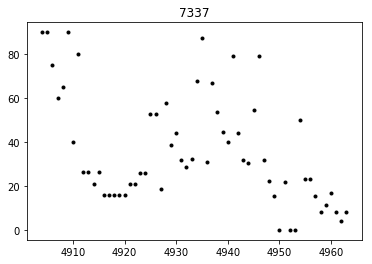

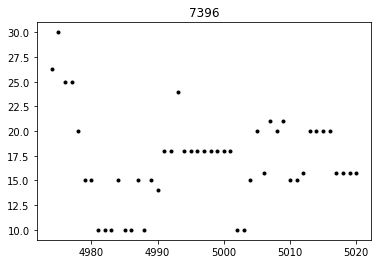

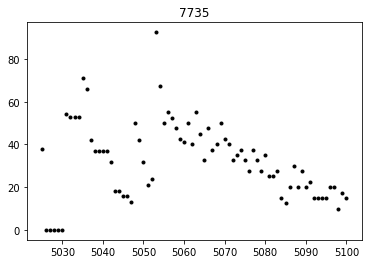

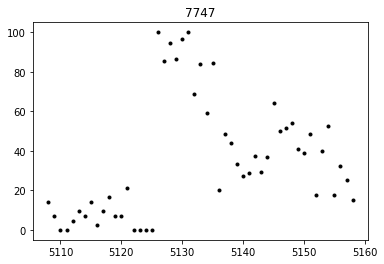

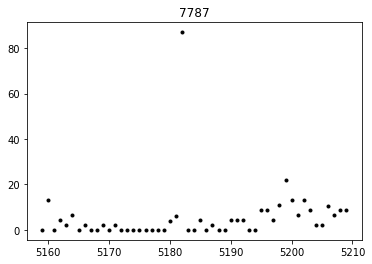

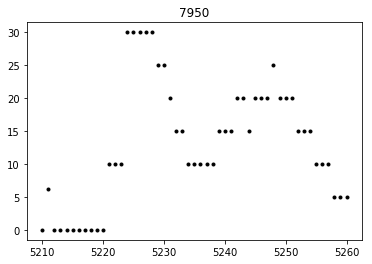

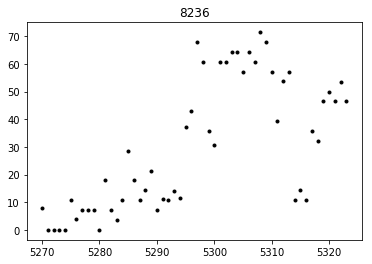

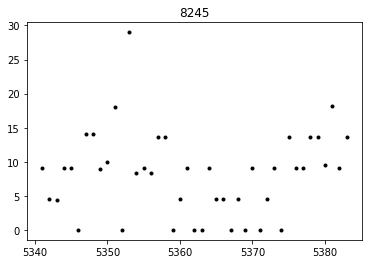

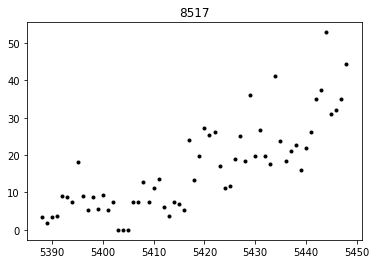

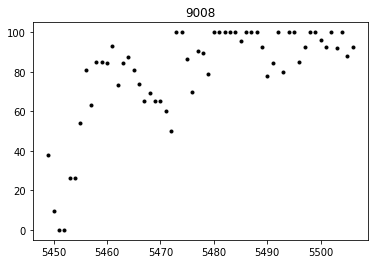

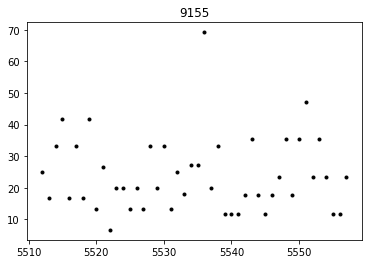

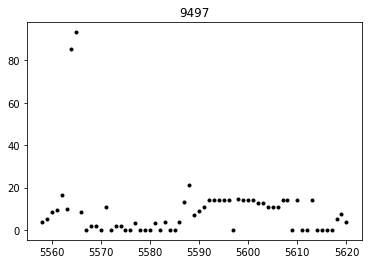

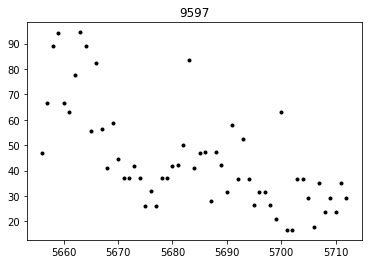

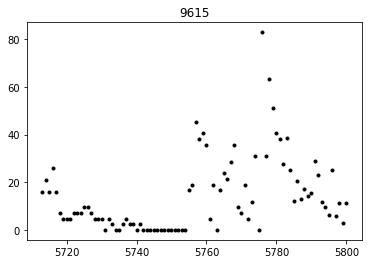

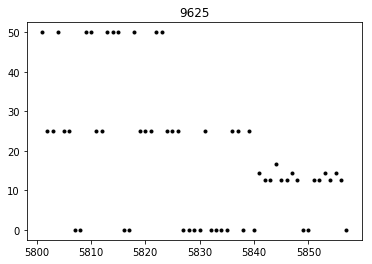

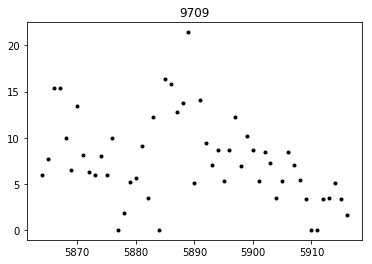

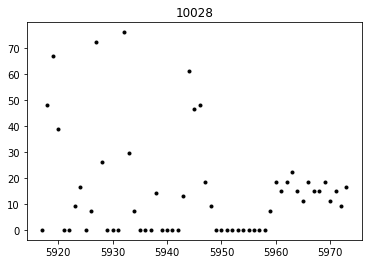

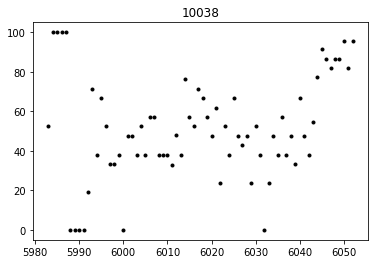

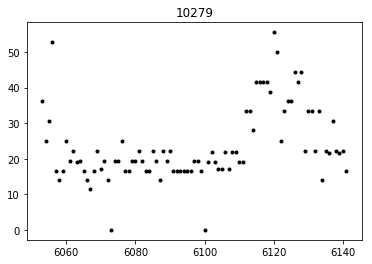

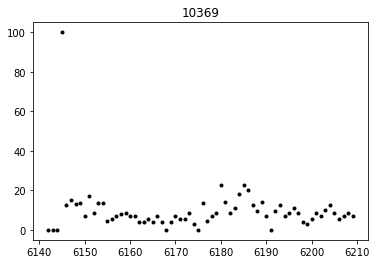

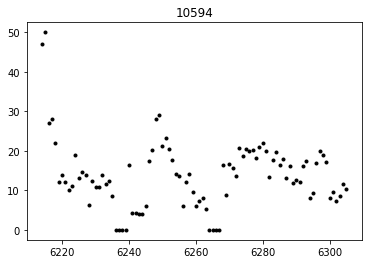

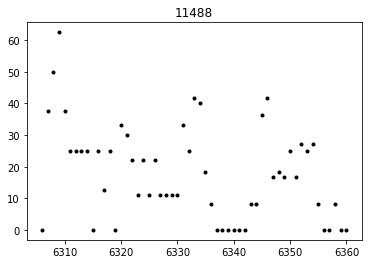

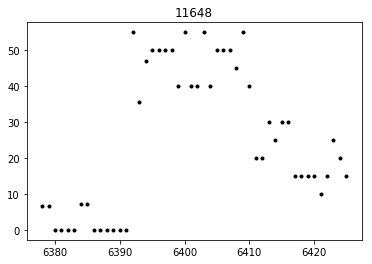

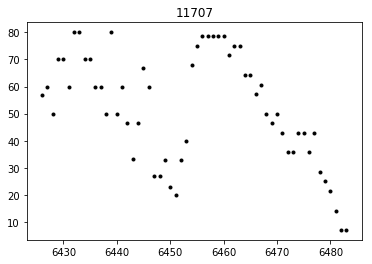

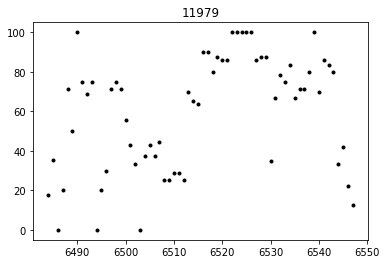

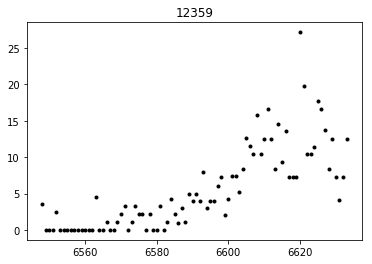

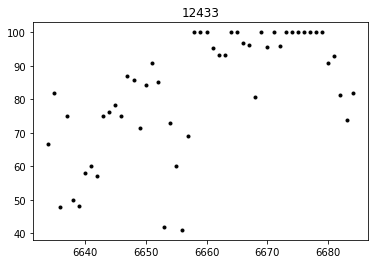

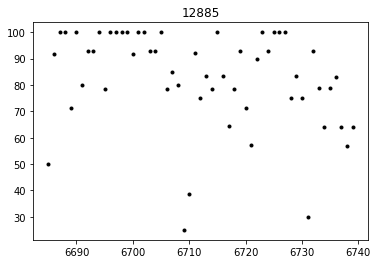

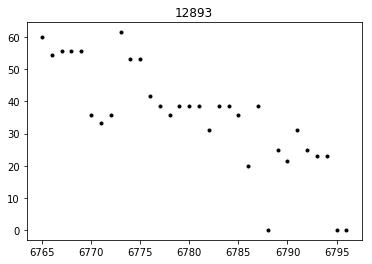

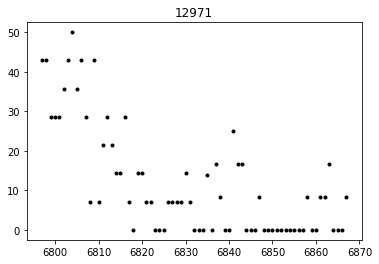

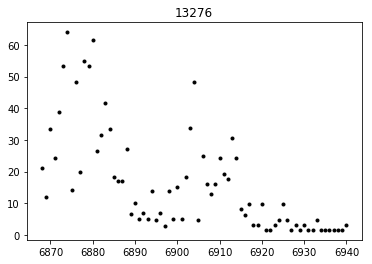

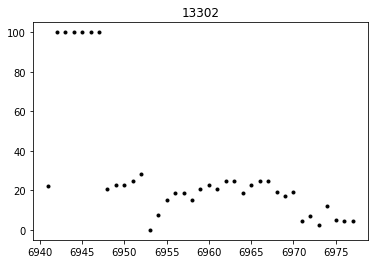

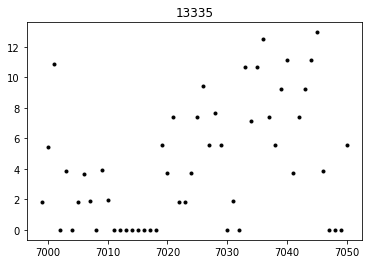

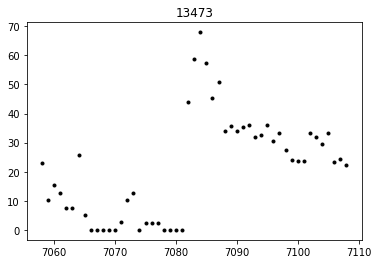

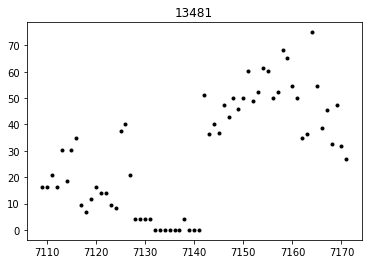

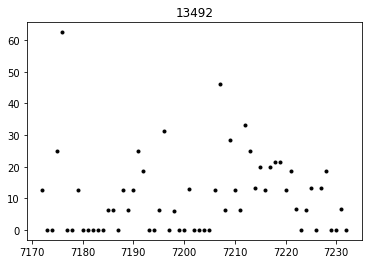

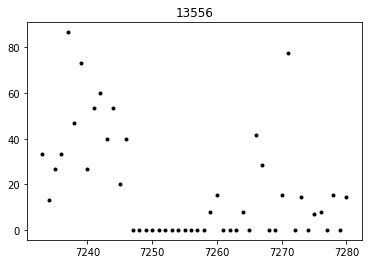

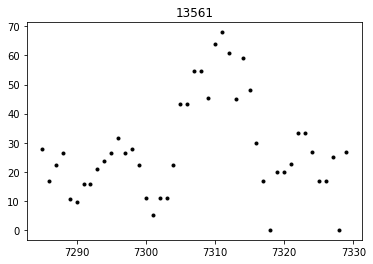

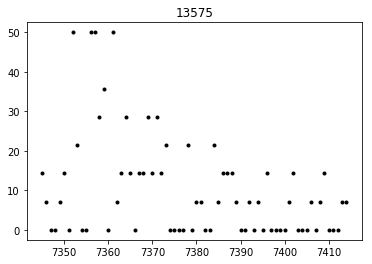

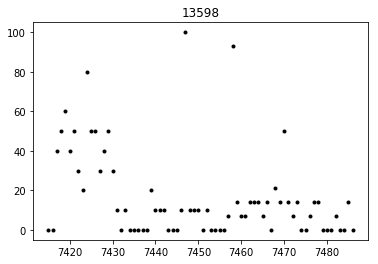

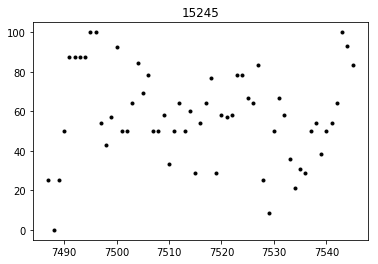

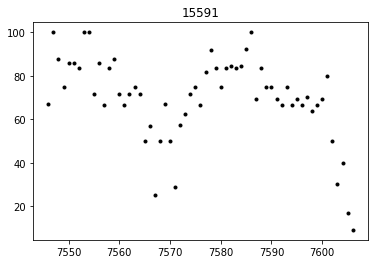

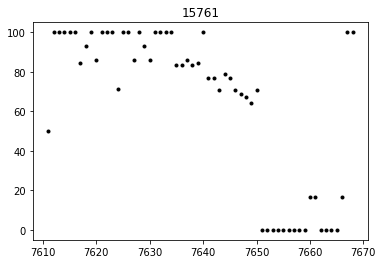

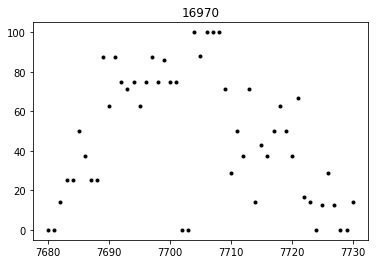

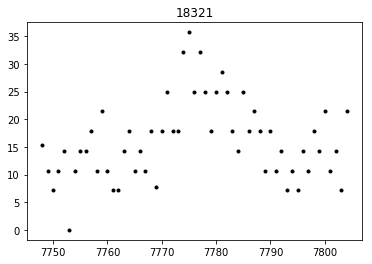

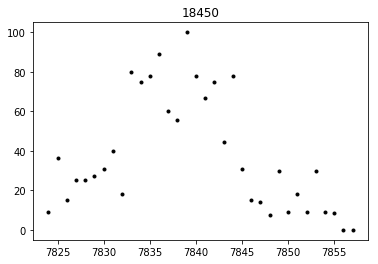

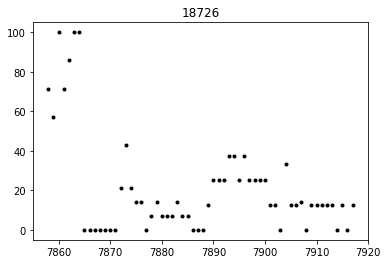

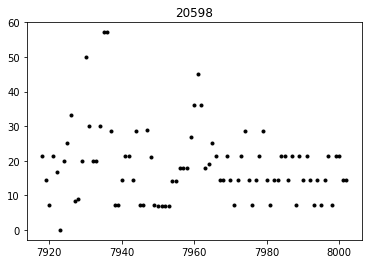

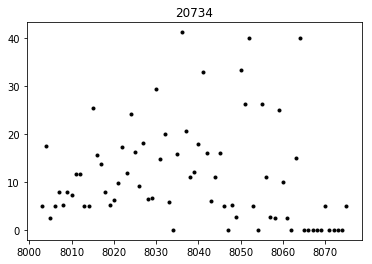

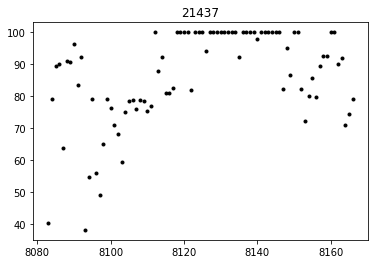

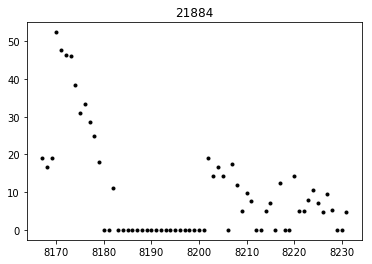

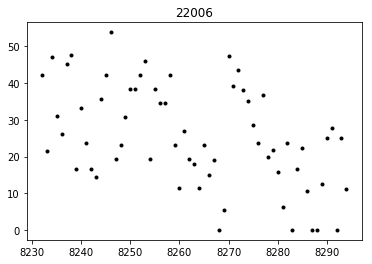

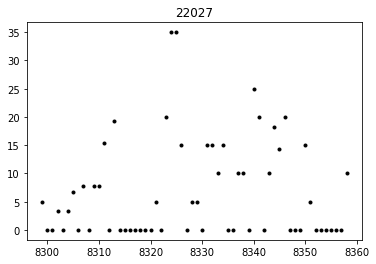

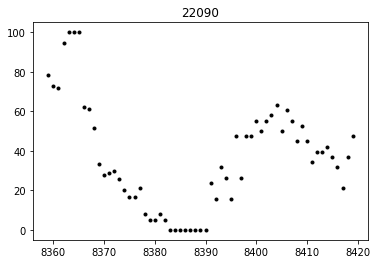

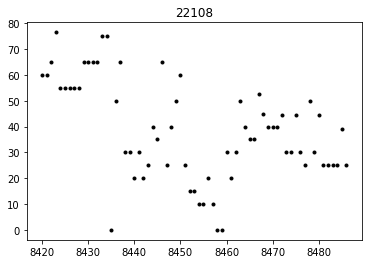

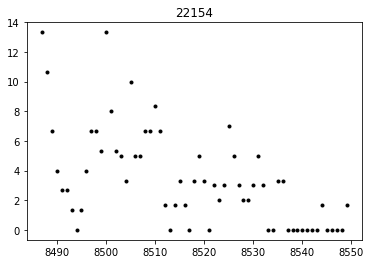

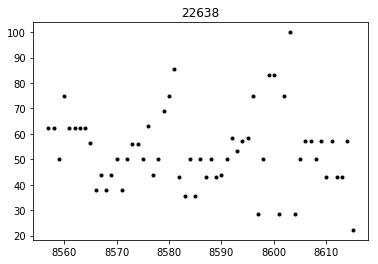

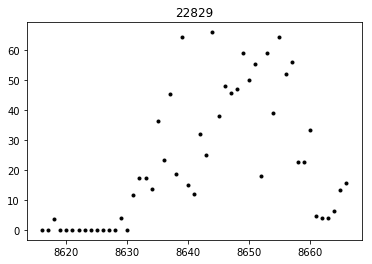

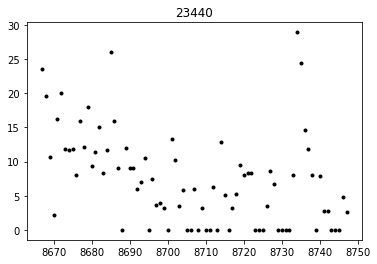

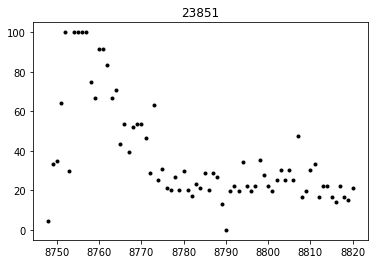

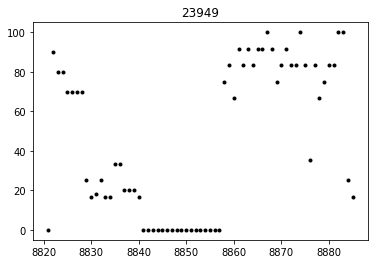

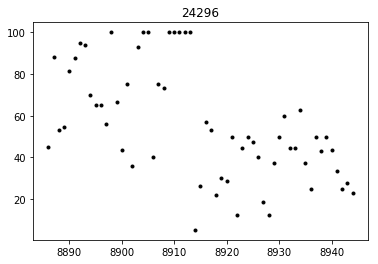

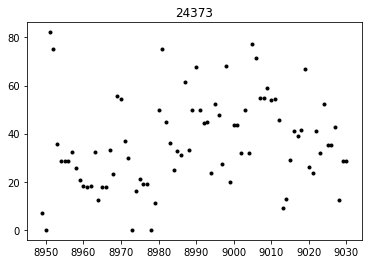

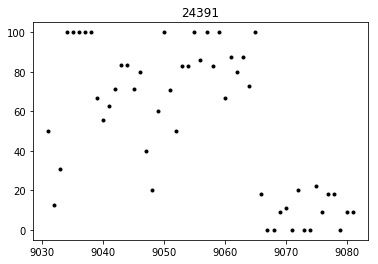

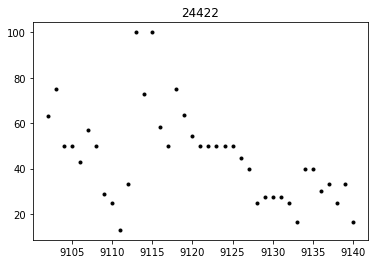

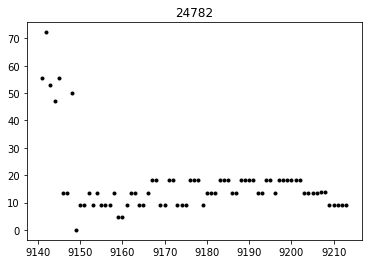

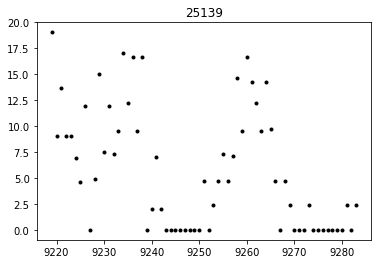

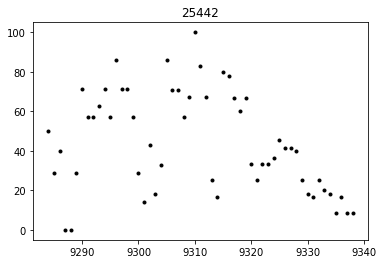

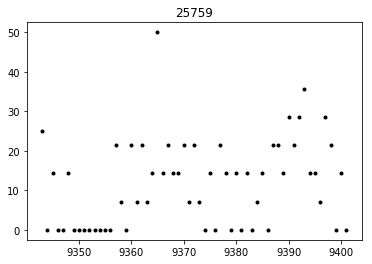

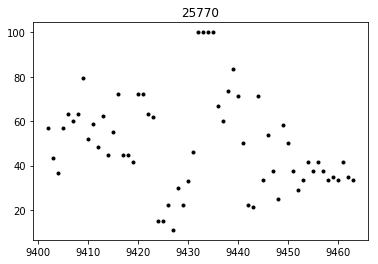

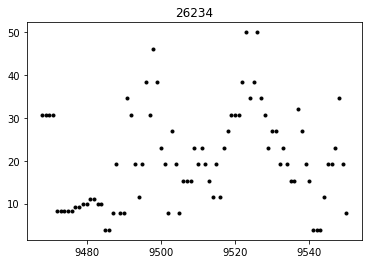

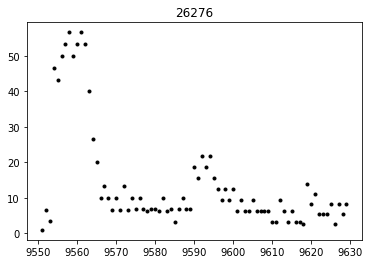

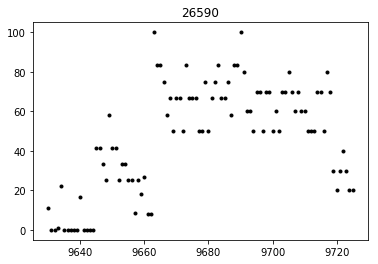

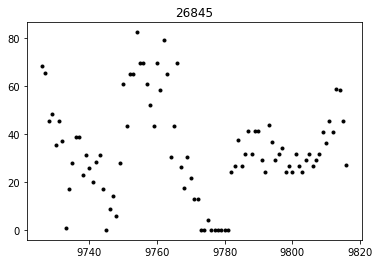

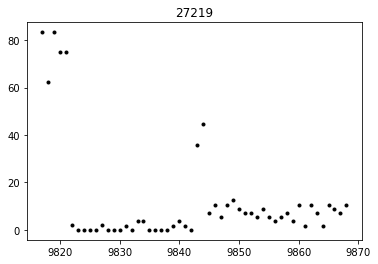

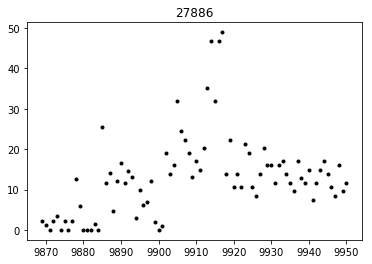

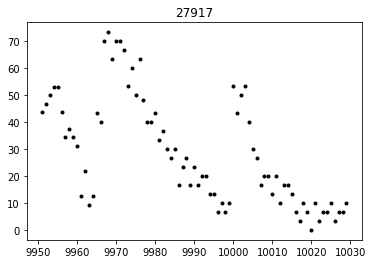

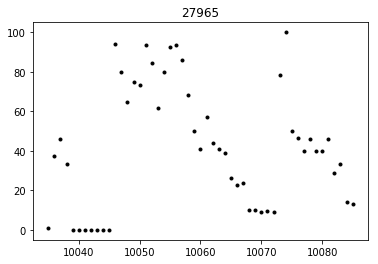

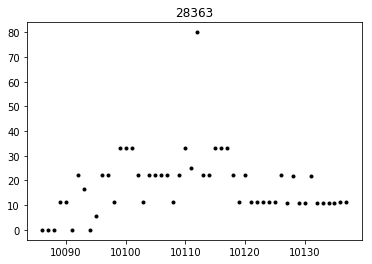

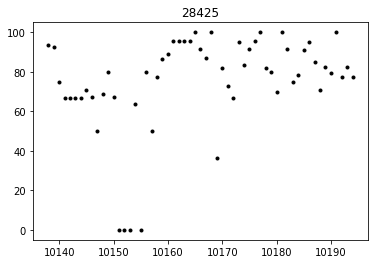

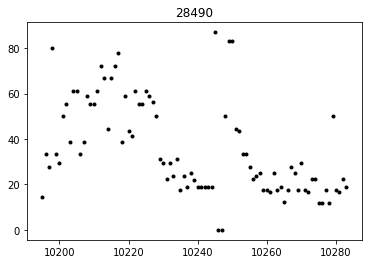

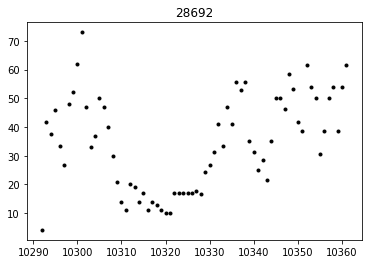

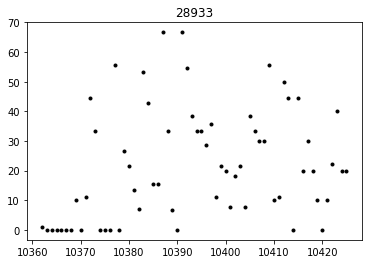

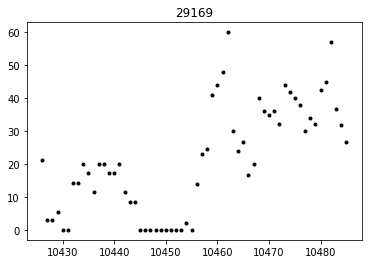

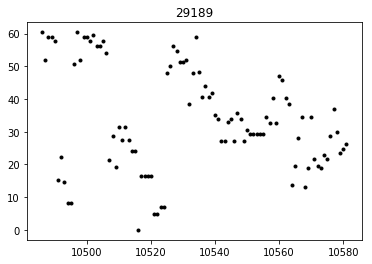

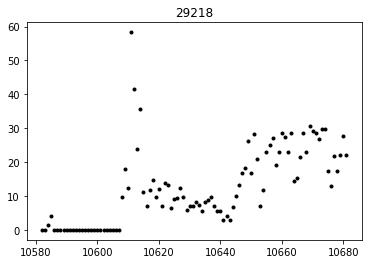

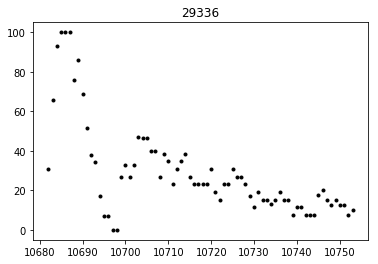

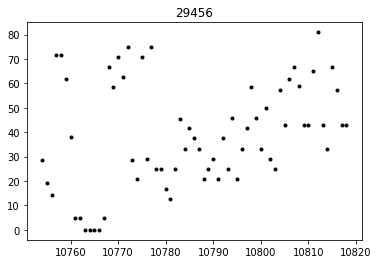

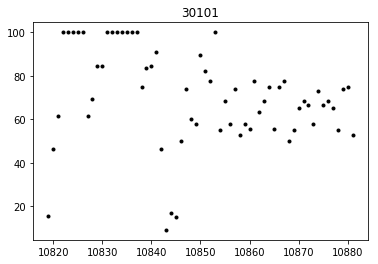

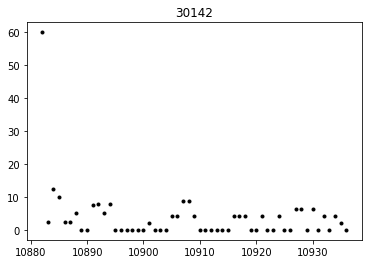

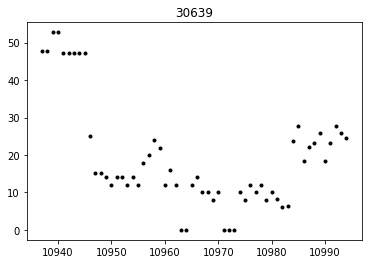

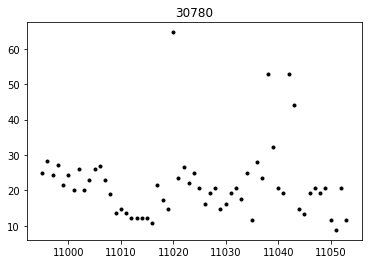

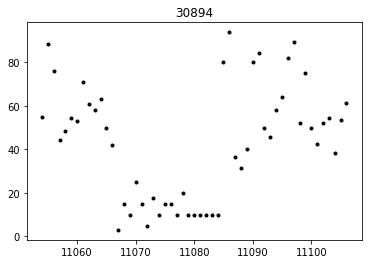

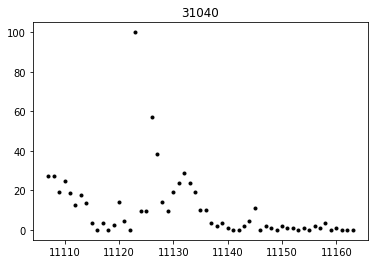

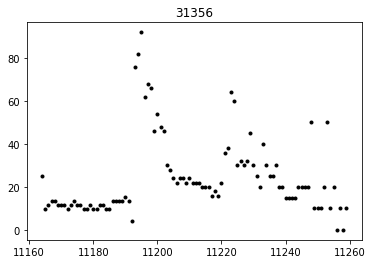

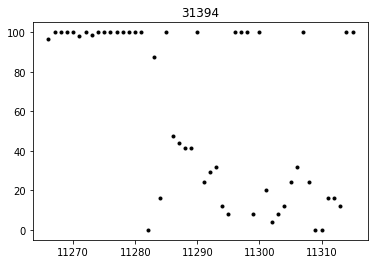

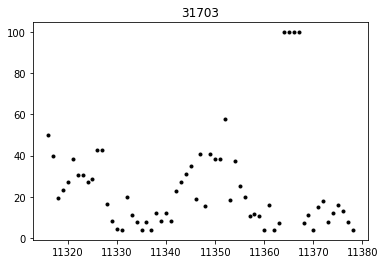

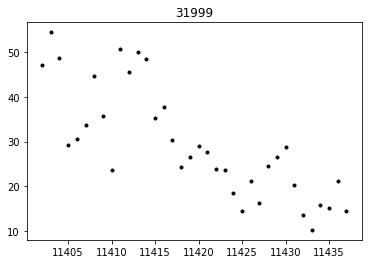

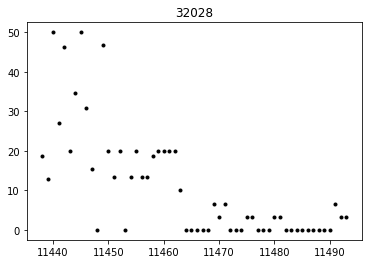

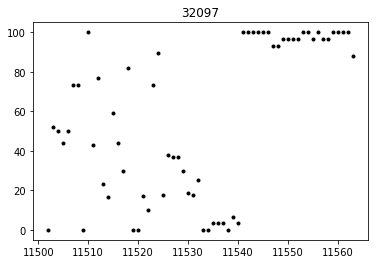

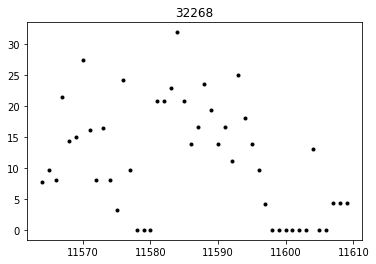

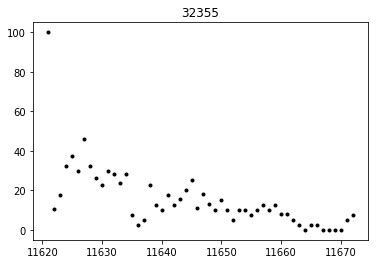

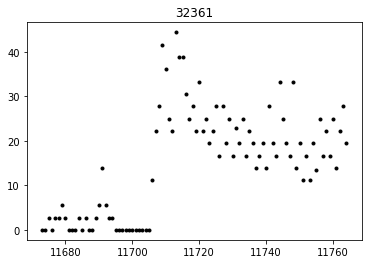

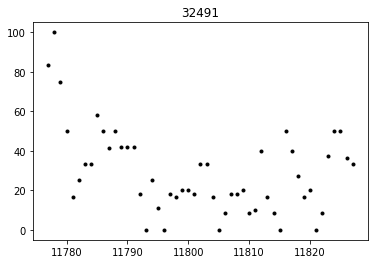

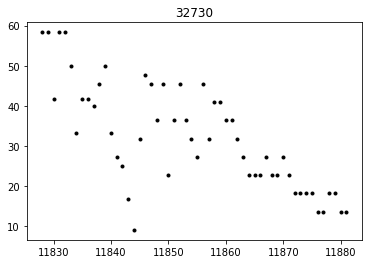

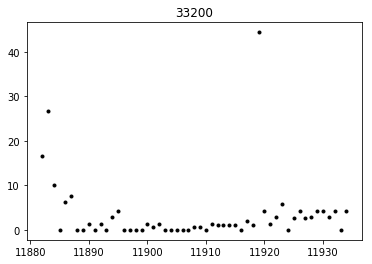

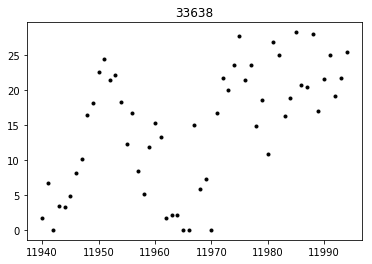

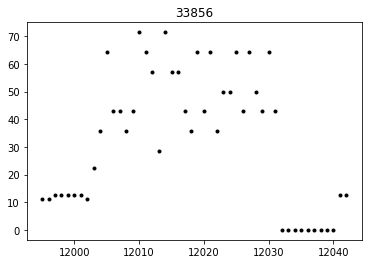

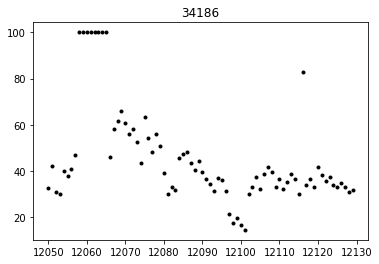

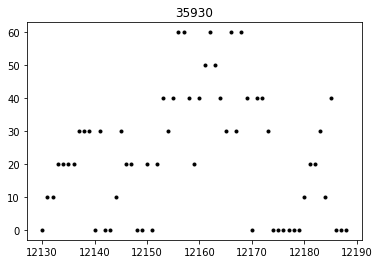

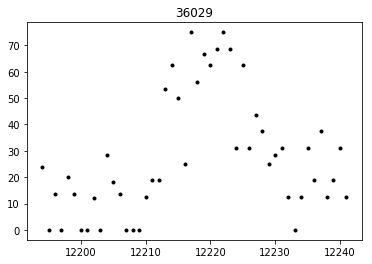

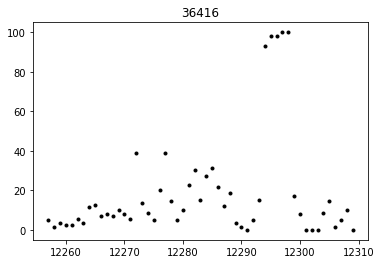

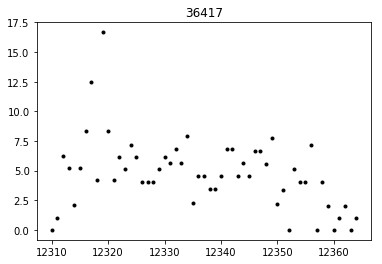

In [103]:
for school in recurring_df['id'].unique().tolist():
    df_school = recurring_df[recurring_df['id']==school]
    df_school['value'].plot(style='k.')
    plt.title(school)
    plt.set_ylim=(0, 100)
    plt.show()

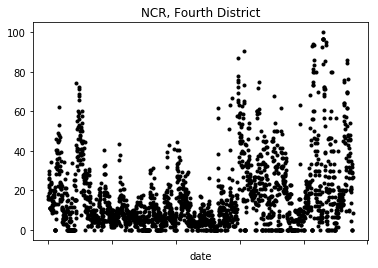

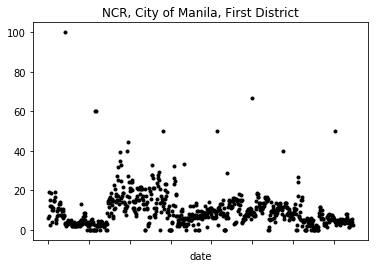

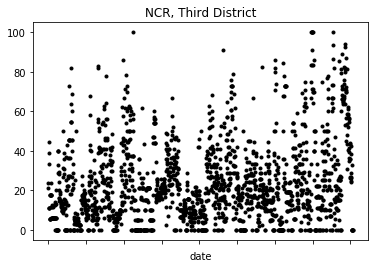

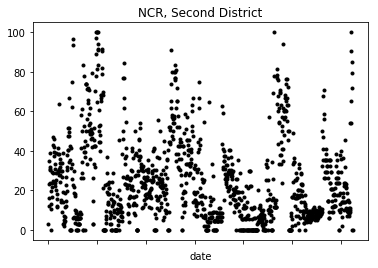

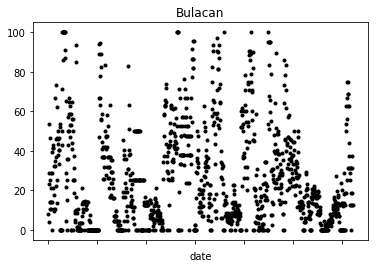

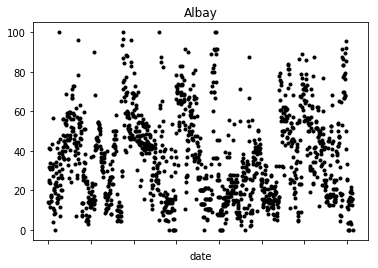

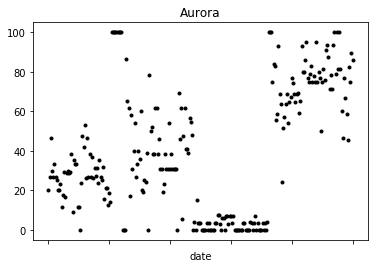

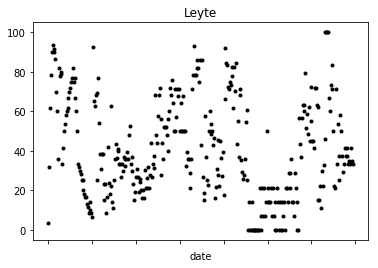

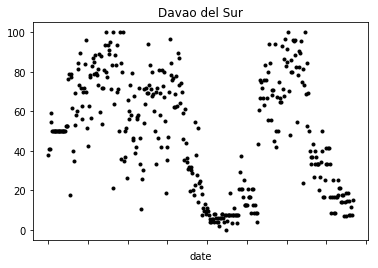

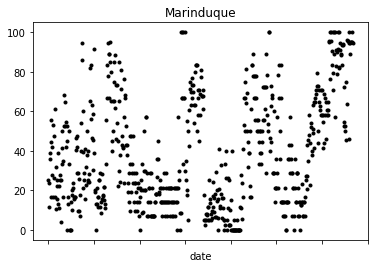

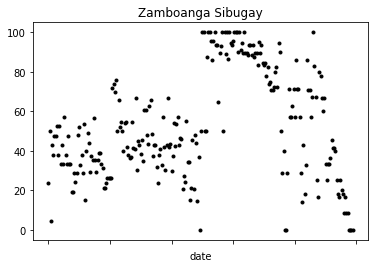

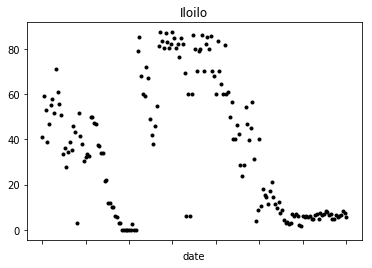

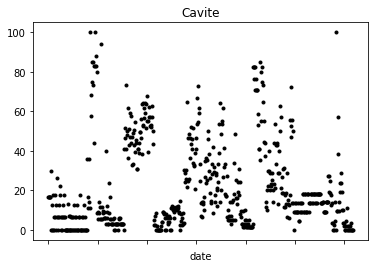

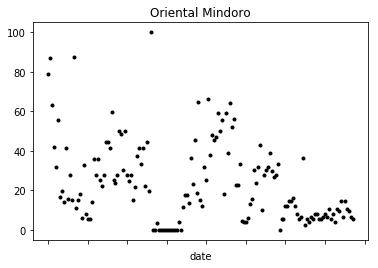

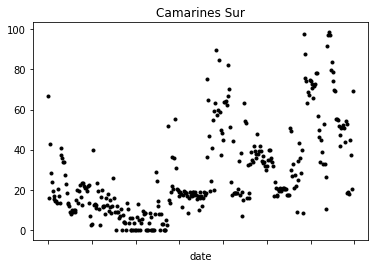

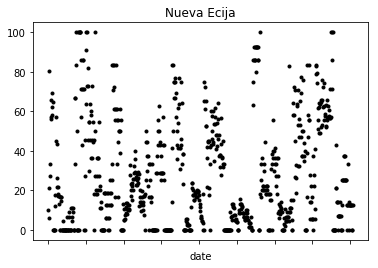

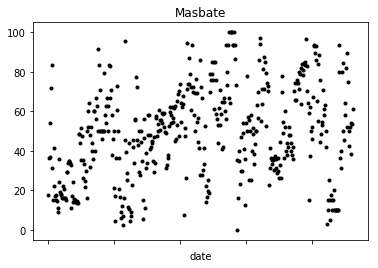

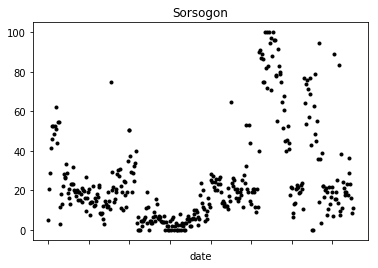

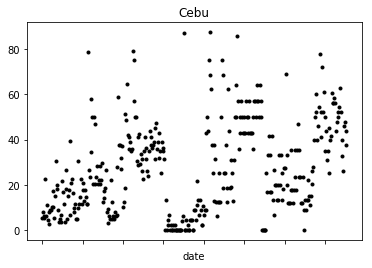

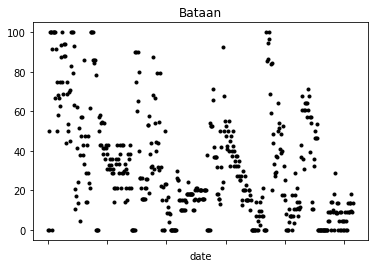

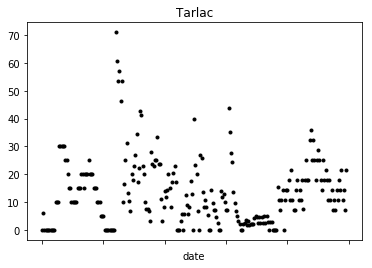

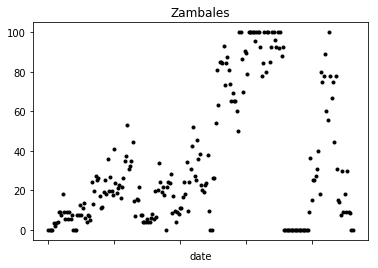

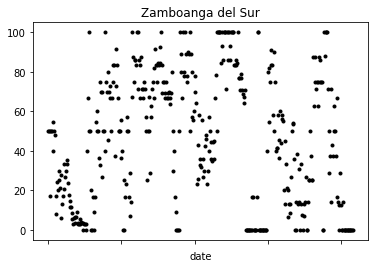

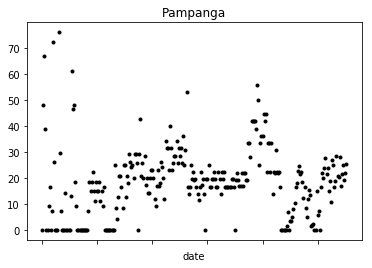

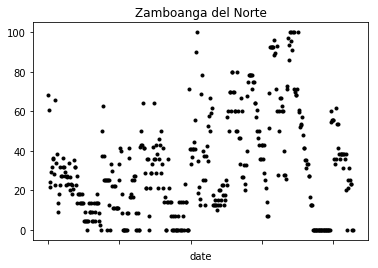

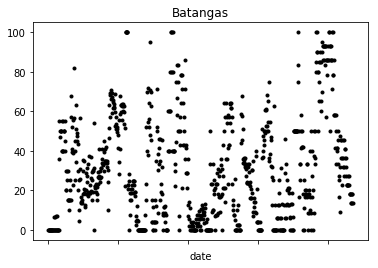

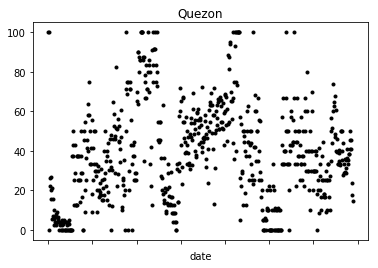

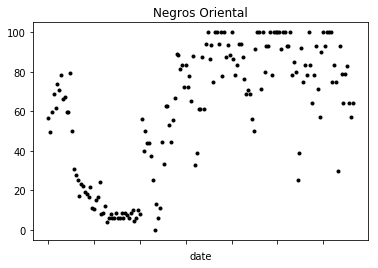

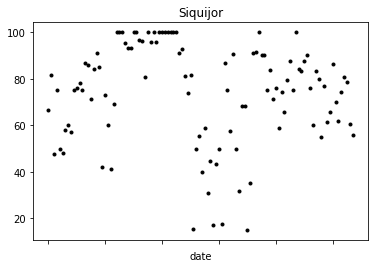

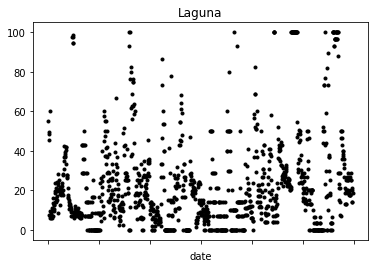

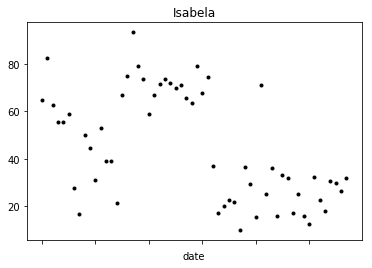

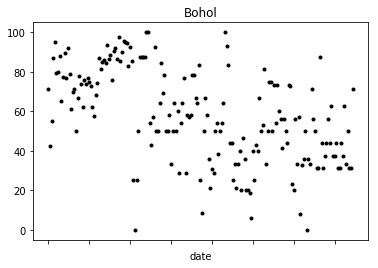

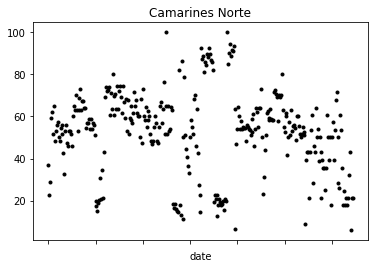

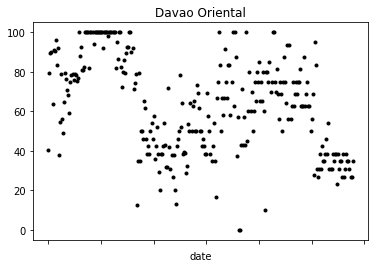

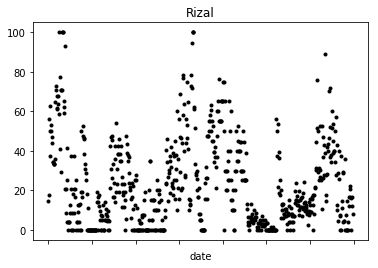

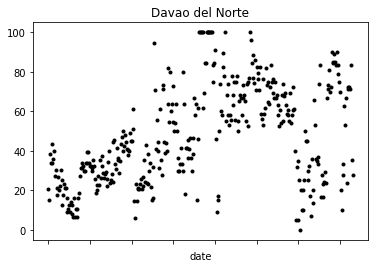

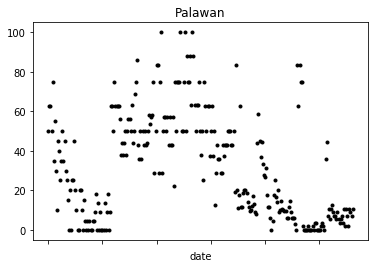

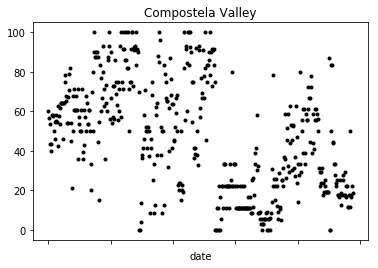

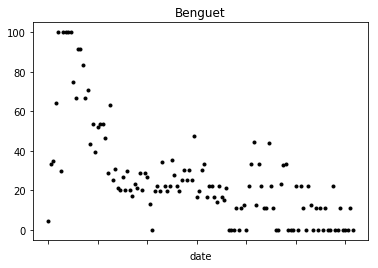

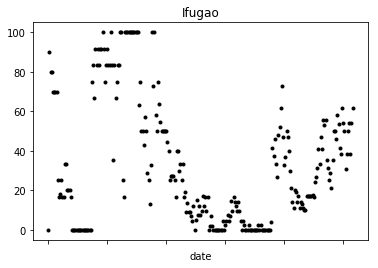

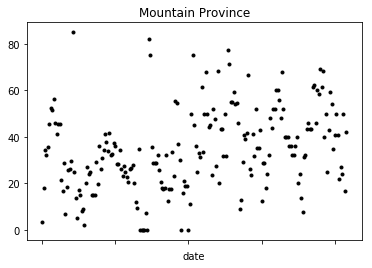

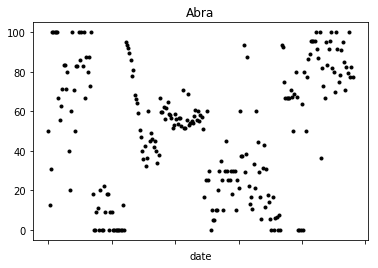

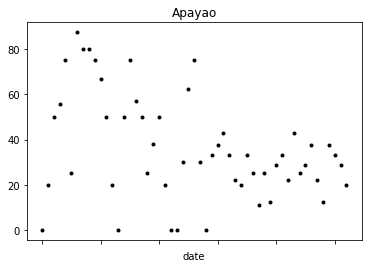

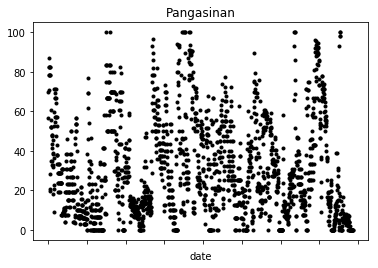

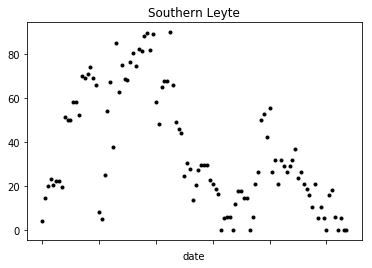

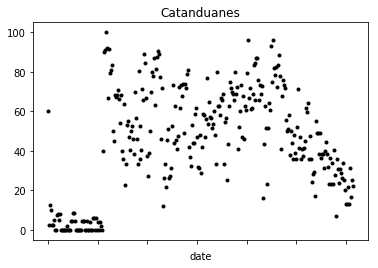

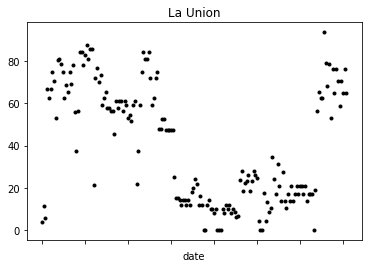

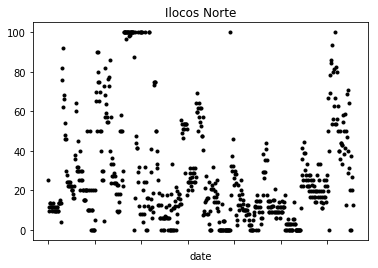

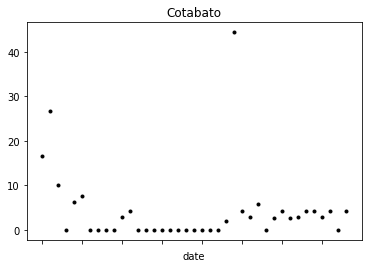

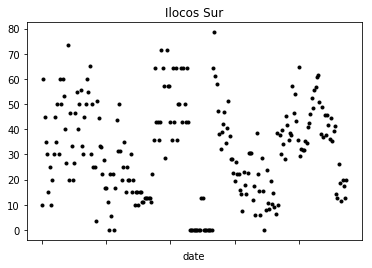

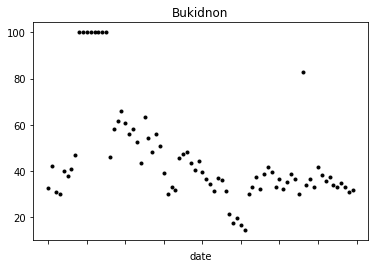

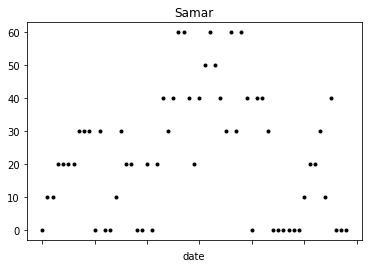

Number of missing provinces:  0


In [12]:
from matplotlib import pyplot as plt

# Plot reported OviTrap index per province, some provinces are not included and are reported as an exception
#semifiltered_df = semifiltered_df[['date', 'id', 'value', 'adm']]
# List of provinces
adm_list = df['adm'].unique().tolist()
i = 0
for province in adm_list:
    df_test = semifiltered_df[semifiltered_df['adm']==province]
    df_test = df_test.set_index(['date'])
    try:
        df_test['value'].plot(style='k.')
        plt.title(province)
        plt.show()
    except:
        print("An exception occurred")
        i= i +1 
print('Number of missing provinces: ', i)

In [107]:
# School plots

# from matplotlib import pyplot as plt
# %matplotlib inline
# # Plot OviTrap index per school for a certain district

# df_test = df[df['adm']=='NCR, Fourth District']
# df_test = df_test.set_index(['date'])

# for school in df_test['id'].unique().tolist():
#     df_school = df_test[df_test['id']==school]
#     df_school['value'].plot(style='k.')
#     plt.title(school)
#     plt.set_ylim=(0, 100)
#     plt.show()